# Defini√ß√£o do problema:

Otimizar decis√µes estrat√©gicas e melhorar a efici√™ncia operacional, com foco em maximizar o desempenho da empresa, pensando, principalmente, em solucionar as dores do cliente

# Importa√ß√£o dos dados:

In [886]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import math

In [887]:
import pandas as pd
df = pd.read_excel('Base_Kaiserhaus.xlsx')
df

macro_bairro           nome_cliente bairro_destino      order_datetime  \
0           Outros            J√∫lia Ramos     Bela Vista 2024-01-01 15:08:00   
1      Santo Amaro     Gustavo R. Rezende    Santo Amaro 2024-01-02 07:49:00   
2          Jardins  Valentina Y. Oliveira        Jardins 2024-01-02 10:14:00   
3     Vila Ol√≠mpia        Mariana Moreira   Vila Ol√≠mpia 2024-01-02 10:58:00   
4            Moema           Daniel Rocha     Ibirapuera 2024-01-02 12:56:00   
...            ...                    ...            ...                 ...   
4995         Moema       Nat√°lia G. Souza     Ibirapuera 2024-12-31 17:17:00   
4996       Morumbi      Yasmin N. Ribeiro        Morumbi 2024-12-31 19:33:00   
4997     Pinheiros            Yuri Castro      Pinheiros 2024-12-31 20:12:00   
4998         Itaim   Henrique J. Ferreira     Itaim Bibi 2024-12-31 21:14:00   
4999         Itaim          Helena Duarte     Itaim Bibi 2024-12-31 21:27:00   

          platform order_mode  distance_km  tempo_preparo_minutos     status  \
0            rappi   delivery     6.916192                     34  delivered   
1            ifood   delivery     5.753085                     16  delivered   
2            ifood   delivery     4.545672                     15  delivered   
3     site_proprio   retirada     0.059679                      6  delivered   
4     site_proprio   retirada     0.102063                     25  delivered   
...            ...        ...          ...                    ...        ...   
4995         rappi   delivery     3.231895                     17  delivered   
4996      whatsapp   retirada     0.218583                      6  delivered   
4997         ifood   delivery     6.389462                     28   canceled   
4998         ifood   delivery     4.148569                     14  delivered   
4999      whatsapp   retirada     0.286058                     23  delivered   

      eta_minutes_quote  actual_delivery_minutes  total_brl classe_pedido  \
0                    50                     62.4     288.01       familia   
1                    45                     35.6     125.02         combo   
2                    43                     34.5     110.76         combo   
3                    19                     14.4      45.16   prato_unico   
4                    28                     26.6     123.12         combo   
...                 ...                      ...        ...           ...   
4995                 37                     29.0      56.43   prato_unico   
4996                 18                     10.7      75.58   prato_unico   
4997                 47                     67.1     145.75         combo   
4998                 40                     32.9      61.36   prato_unico   
4999                 29                     21.8      87.40         combo   

      platform_commission_pct  num_itens  satisfacao_nivel  
0                        0.16          8                 3  
1                        0.16          3                 5  
2                        0.12          4                 5  
3                        0.00          1                 5  
4                        0.00          3                 5  
...                       ...        ...               ...  
4995                     0.16          3                 5  
4996                     0.00          2                 5  
4997                     0.16          4                 2  
4998                     0.16          1                 5  
4999                     0.00          1                 5  

[5000 rows x 16 columns]

# Tratamento de dados

In [888]:
df.isnull().sum()

macro_bairro                 0
nome_cliente                 0
bairro_destino               0
order_datetime               0
platform                     0
order_mode                   0
distance_km                323
tempo_preparo_minutos        0
status                       0
eta_minutes_quote            0
actual_delivery_minutes    200
total_brl                    0
classe_pedido                0
platform_commission_pct      0
num_itens                    0
satisfacao_nivel             0
dtype: int64

In [889]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()

macro_bairro               0
nome_cliente               0
bairro_destino             0
order_datetime             0
platform                   0
order_mode                 0
distance_km                0
tempo_preparo_minutos      0
status                     0
eta_minutes_quote          0
actual_delivery_minutes    0
total_brl                  0
classe_pedido              0
platform_commission_pct    0
num_itens                  0
satisfacao_nivel           0
dtype: int64

In [890]:
df

macro_bairro           nome_cliente bairro_destino      order_datetime  \
0           Outros            J√∫lia Ramos     Bela Vista 2024-01-01 15:08:00   
1      Santo Amaro     Gustavo R. Rezende    Santo Amaro 2024-01-02 07:49:00   
2          Jardins  Valentina Y. Oliveira        Jardins 2024-01-02 10:14:00   
3     Vila Ol√≠mpia        Mariana Moreira   Vila Ol√≠mpia 2024-01-02 10:58:00   
4            Moema           Daniel Rocha     Ibirapuera 2024-01-02 12:56:00   
...            ...                    ...            ...                 ...   
4995         Moema       Nat√°lia G. Souza     Ibirapuera 2024-12-31 17:17:00   
4996       Morumbi      Yasmin N. Ribeiro        Morumbi 2024-12-31 19:33:00   
4997     Pinheiros            Yuri Castro      Pinheiros 2024-12-31 20:12:00   
4998         Itaim   Henrique J. Ferreira     Itaim Bibi 2024-12-31 21:14:00   
4999         Itaim          Helena Duarte     Itaim Bibi 2024-12-31 21:27:00   

          platform order_mode  distance_km  tempo_preparo_minutos     status  \
0            rappi   delivery     6.916192                     34  delivered   
1            ifood   delivery     5.753085                     16  delivered   
2            ifood   delivery     4.545672                     15  delivered   
3     site_proprio   retirada     0.059679                      6  delivered   
4     site_proprio   retirada     0.102063                     25  delivered   
...            ...        ...          ...                    ...        ...   
4995         rappi   delivery     3.231895                     17  delivered   
4996      whatsapp   retirada     0.218583                      6  delivered   
4997         ifood   delivery     6.389462                     28   canceled   
4998         ifood   delivery     4.148569                     14  delivered   
4999      whatsapp   retirada     0.286058                     23  delivered   

      eta_minutes_quote  actual_delivery_minutes  total_brl classe_pedido  \
0                    50                     62.4     288.01       familia   
1                    45                     35.6     125.02         combo   
2                    43                     34.5     110.76         combo   
3                    19                     14.4      45.16   prato_unico   
4                    28                     26.6     123.12         combo   
...                 ...                      ...        ...           ...   
4995                 37                     29.0      56.43   prato_unico   
4996                 18                     10.7      75.58   prato_unico   
4997                 47                     67.1     145.75         combo   
4998                 40                     32.9      61.36   prato_unico   
4999                 29                     21.8      87.40         combo   

      platform_commission_pct  num_itens  satisfacao_nivel  
0                        0.16          8                 3  
1                        0.16          3                 5  
2                        0.12          4                 5  
3                        0.00          1                 5  
4                        0.00          3                 5  
...                       ...        ...               ...  
4995                     0.16          3                 5  
4996                     0.00          2                 5  
4997                     0.16          4                 2  
4998                     0.16          1                 5  
4999                     0.00          1                 5  

[5000 rows x 16 columns]

# Coleta e explora√ß√£o dos dados

An√°lise b√°sica

In [891]:
df['status'].value_counts()

status
delivered     4802
canceled       180
chargeback      18
Name: count, dtype: int64

<Axes: xlabel='status'>

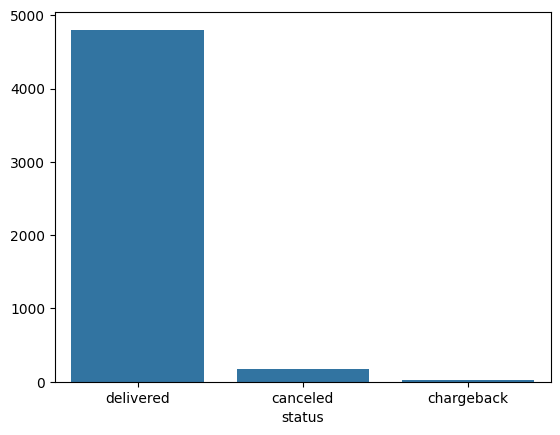

In [892]:
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values)

In [893]:
df['order_mode'].value_counts()

order_mode
delivery    4024
retirada     976
Name: count, dtype: int64

<Axes: xlabel='order_mode'>

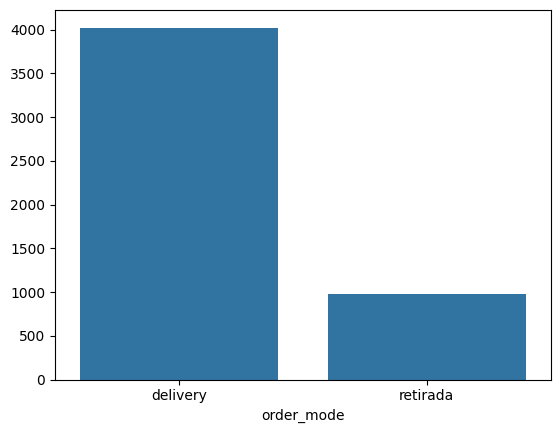

In [894]:
sns.barplot(x=df['order_mode'].value_counts().index, y=df['order_mode'].value_counts().values)

In [895]:
df['platform'].value_counts()

platform
ifood           2661
site_proprio    1052
rappi            747
whatsapp         540
Name: count, dtype: int64

<Axes: xlabel='platform'>

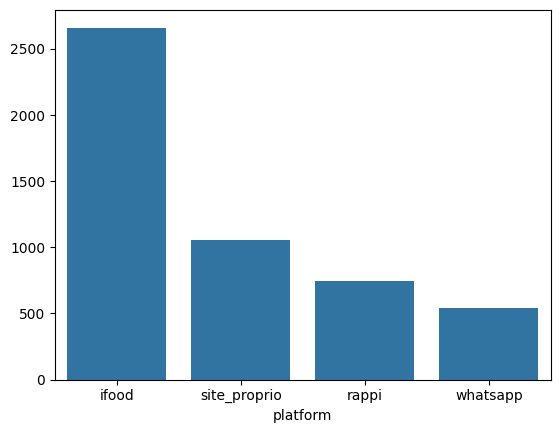

In [896]:
sns.barplot(x=df['platform'].value_counts().index, y=df['platform'].value_counts().values)

In [897]:
df['classe_pedido'].value_counts()

classe_pedido
prato_unico    2775
combo          1716
familia         509
Name: count, dtype: int64

<Axes: xlabel='classe_pedido'>

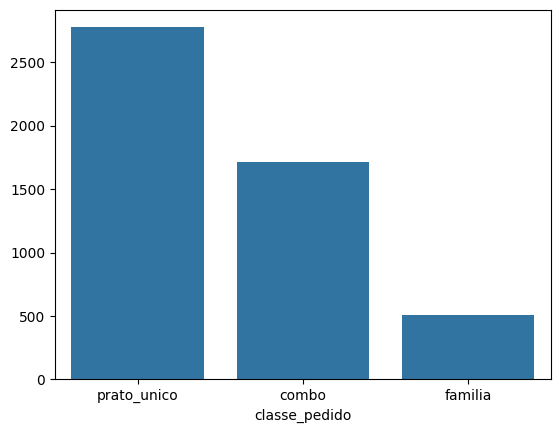

In [898]:
sns.barplot(x=df['classe_pedido'].value_counts().index, y=df['classe_pedido'].value_counts().values)

In [899]:
df['macro_bairro'].value_counts()

macro_bairro
Brooklin        881
Moema           679
Vila Mariana    530
Vila Ol√≠mpia    516
Itaim           497
Jardins         403
Pinheiros       393
Santo Amaro     387
Outros          364
Morumbi         350
Name: count, dtype: int64

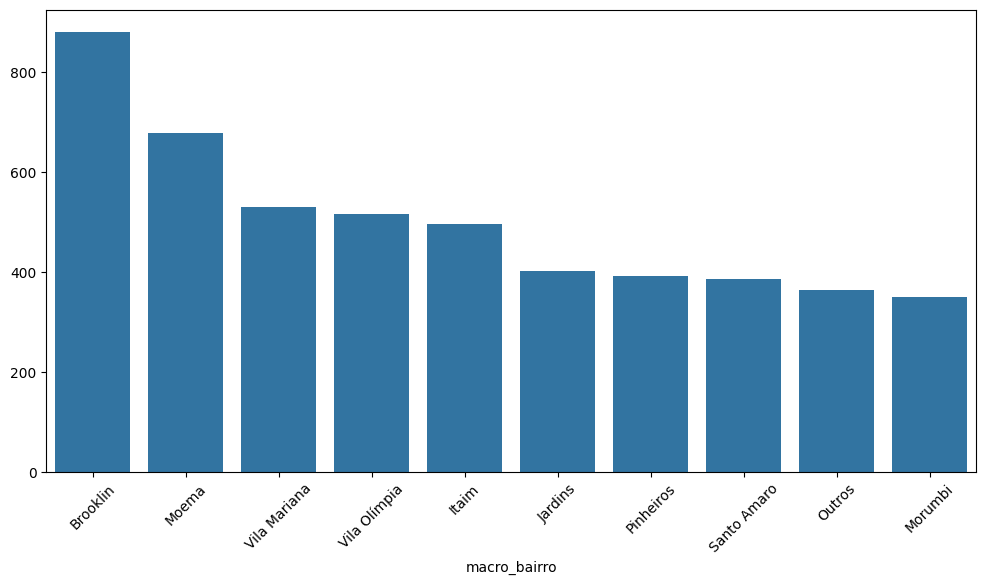

In [900]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['macro_bairro'].value_counts().index, y=df['macro_bairro'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

In [901]:
df.groupby('macro_bairro')['bairro_destino'].nunique()

macro_bairro
Brooklin        2
Itaim           1
Jardins         2
Moema           2
Morumbi         2
Outros          4
Pinheiros       1
Santo Amaro     2
Vila Mariana    3
Vila Ol√≠mpia    1
Name: bairro_destino, dtype: int64

In [902]:
df_brooklin = df.query('macro_bairro == "Brooklin"')
df_itaim = df.query('macro_bairro == "Itaim"')
df_jardins = df.query('macro_bairro == "Jardins"')
df_moema = df.query('macro_bairro == "Moema"')
df_morumbi = df.query('macro_bairro == "Morumbi"')
df_outros = df.query('macro_bairro == "Outros"')
df_pinheiros = df.query('macro_bairro == "Pinheiros"')
df_santo_amaro = df.query('macro_bairro == "Santo Amaro"')
df_vila_mariana = df.query('macro_bairro == "Vila Mariana"')
df_vila_olimpia = df.query('macro_bairro == "Vila Ol√≠mpia"')

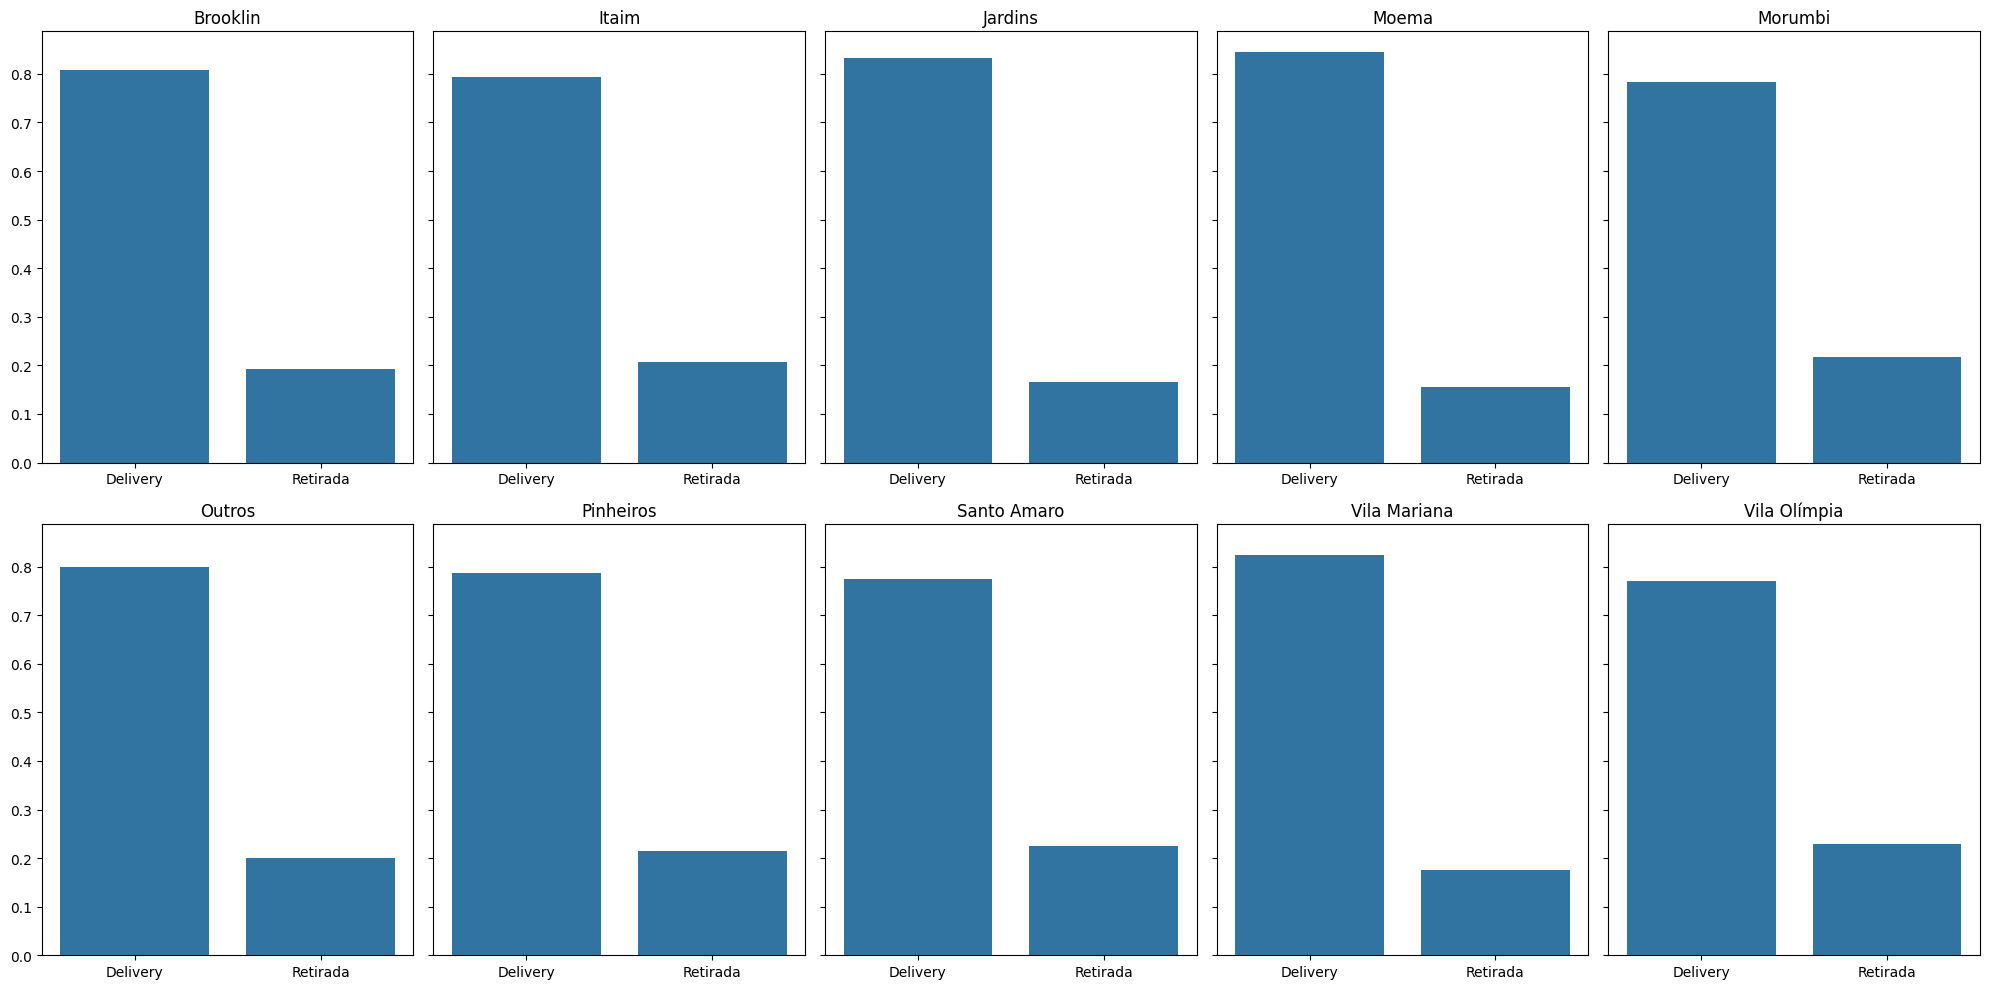

In [903]:
df_brooklin_tamanho = df_brooklin.count().unique()
df_delivery_brooklin = df_brooklin.query('order_mode == "delivery"').count().unique()
df_retirada_brooklin = df_brooklin.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_brooklin = (df_delivery_brooklin / df_brooklin_tamanho)
porcentagem_retirada_brooklin = (df_retirada_brooklin / df_brooklin_tamanho)




df_itaim_tamanho = df_itaim.count().unique()
df_delivery_itaim = df_itaim.query('order_mode == "delivery"').count().unique()
df_retirada_itaim = df_itaim.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_itaim = (df_delivery_itaim / df_itaim_tamanho)
porcentagem_retirada_itaim = (df_retirada_itaim / df_itaim_tamanho)




df_jardins_tamanho = df_jardins.count().unique()
df_delivery_jardins = df_jardins.query('order_mode == "delivery"').count().unique()
df_retirada_jardins = df_jardins.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_jardins = (df_delivery_jardins / df_jardins_tamanho)
porcentagem_retirada_jardins = (df_retirada_jardins / df_jardins_tamanho)




df_moema_tamanho = df_moema.count().unique()
df_delivery_moema = df_moema.query('order_mode == "delivery"').count().unique()
df_retirada_moema = df_moema.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_moema = (df_delivery_moema / df_moema_tamanho)
porcentagem_retirada_moema = (df_retirada_moema / df_moema_tamanho)




df_morumbi_tamanho = df_morumbi.count().unique()
df_delivery_morumbi = df_morumbi.query('order_mode == "delivery"').count().unique()
df_retirada_morumbi = df_morumbi.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_morumbi = (df_delivery_morumbi / df_morumbi_tamanho)
porcentagem_retirada_morumbi = (df_retirada_morumbi / df_morumbi_tamanho)



df_outros_tamanho = df_outros.count().unique()
df_delivery_outros = df_outros.query('order_mode == "delivery"').count().unique()
df_retirada_outros = df_outros.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_outros = (df_delivery_outros / df_outros_tamanho)
porcentagem_retirada_outros = (df_retirada_outros / df_outros_tamanho)




df_pinheiros_tamanho = df_pinheiros.count().unique()
df_delivery_pinheiros = df_pinheiros.query('order_mode == "delivery"').count().unique()
df_retirada_pinheiros = df_pinheiros.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_pinheiros = (df_delivery_pinheiros / df_pinheiros_tamanho)
porcentagem_retirada_pinheiros = (df_retirada_pinheiros / df_pinheiros_tamanho)




df_santo_amaro_tamanho = df_santo_amaro.count().unique()
df_delivery_santo_amaro = df_santo_amaro.query('order_mode == "delivery"').count().unique()
df_retirada_santo_amaro = df_santo_amaro.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_santo_amaro = (df_delivery_santo_amaro / df_santo_amaro_tamanho)
porcentagem_retirada_santo_amaro = (df_retirada_santo_amaro / df_santo_amaro_tamanho)




df_vila_mariana_tamanho = df_vila_mariana.count().unique()
df_delivery_vila_mariana = df_vila_mariana.query('order_mode == "delivery"').count().unique()
df_retirada_vila_mariana = df_vila_mariana.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_vila_mariana = (df_delivery_vila_mariana / df_vila_mariana_tamanho)
porcentagem_retirada_vila_mariana = (df_retirada_vila_mariana / df_vila_mariana_tamanho)




df_vila_olimpia_tamanho = df_vila_olimpia.count().unique()
df_delivery_vila_olimpia = df_vila_olimpia.query('order_mode == "delivery"').count().unique()
df_retirada_vila_olimpia = df_vila_olimpia.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_vila_olimpia = (df_delivery_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_retirada_vila_olimpia = (df_retirada_vila_olimpia / df_vila_olimpia_tamanho)





fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)

sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_brooklin[0], porcentagem_retirada_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_itaim[0], porcentagem_retirada_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_jardins[0], porcentagem_retirada_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_moema[0], porcentagem_retirada_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_morumbi[0], porcentagem_retirada_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_outros[0], porcentagem_retirada_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_pinheiros[0], porcentagem_retirada_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_santo_amaro[0], porcentagem_retirada_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_vila_mariana[0], porcentagem_retirada_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_vila_olimpia[0], porcentagem_retirada_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Ol√≠mpia')

plt.tight_layout()
plt.show()

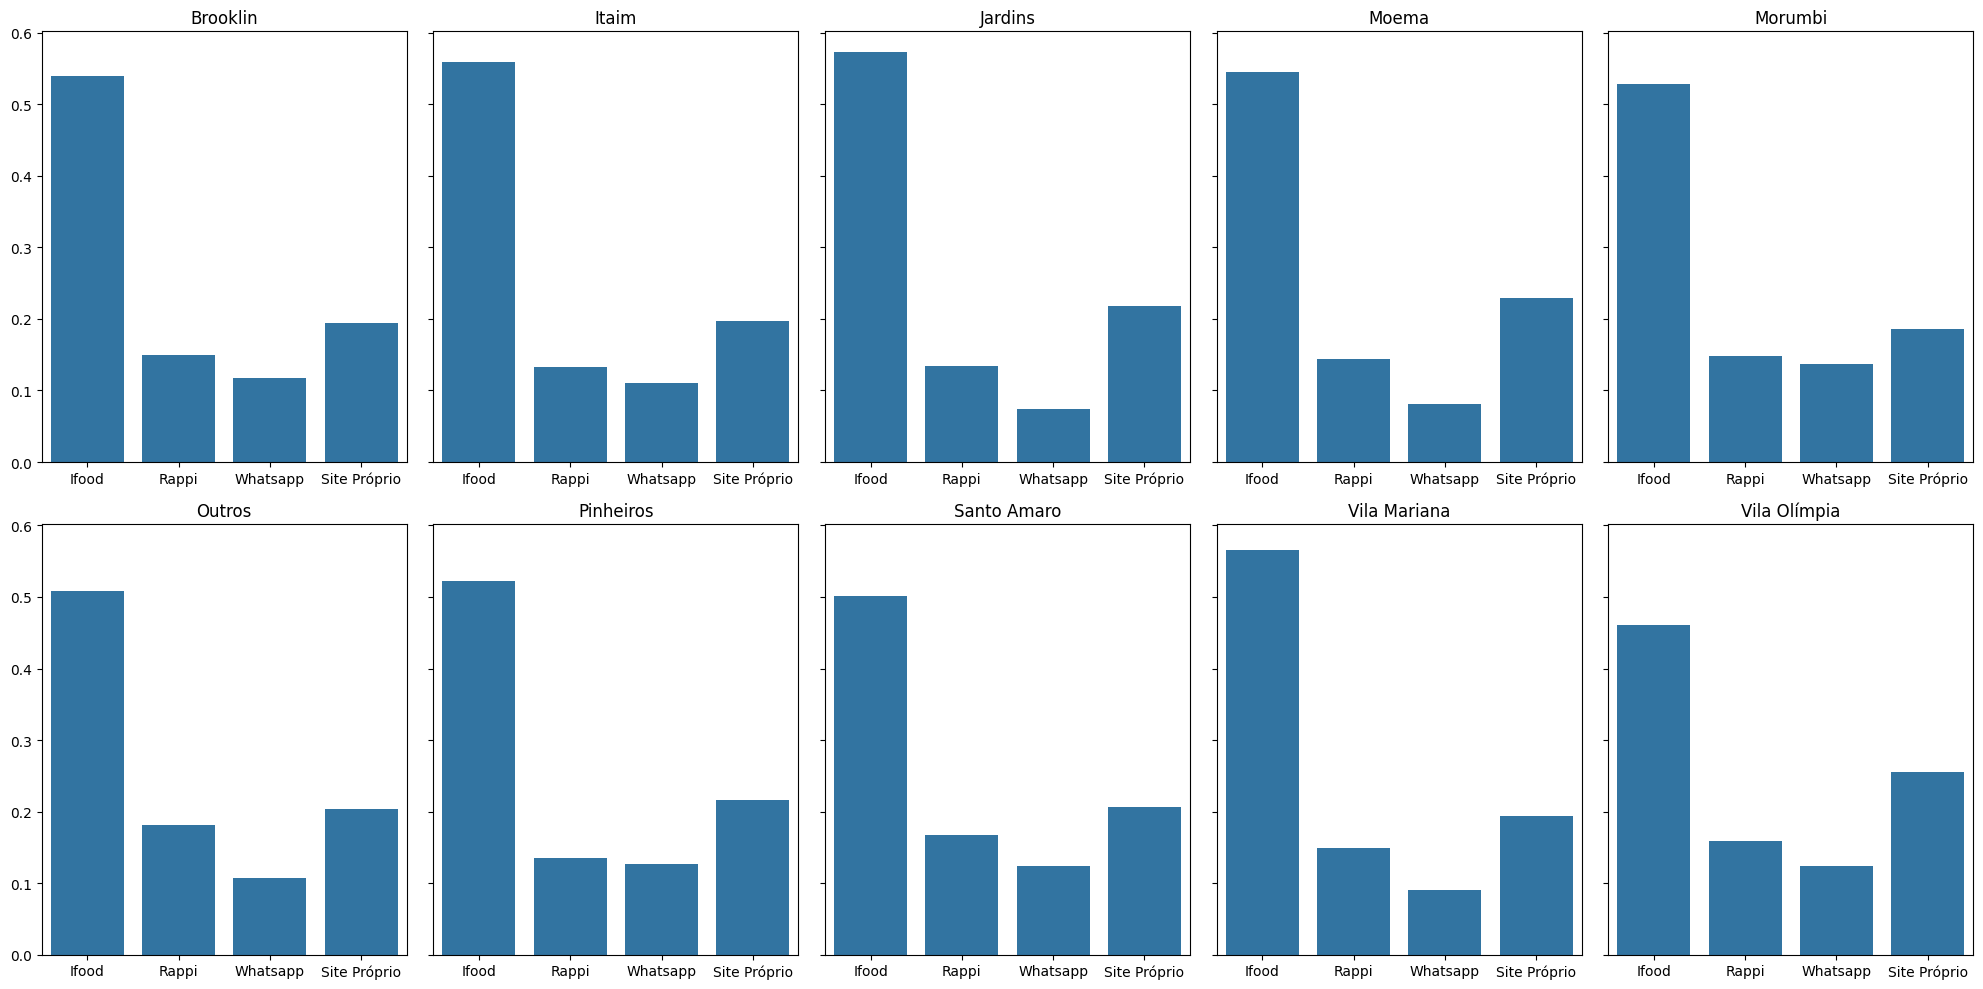

In [904]:
df_ifood_brooklin = df_brooklin.query('platform == "ifood"').count().unique()
df_rappi_brooklin = df_brooklin.query('platform == "rappi"').count().unique()
df_whatsapp_brooklin = df_brooklin.query('platform == "whatsapp"').count().unique()
df_site_proprio_brooklin = df_brooklin.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_brooklin = (df_ifood_brooklin / df_brooklin_tamanho)
porcentagem_rappi_brooklin = (df_rappi_brooklin / df_brooklin_tamanho)
porcentagem_whatsapp_brooklin = (df_whatsapp_brooklin / df_brooklin_tamanho)
porcentagem_site_proprio_brooklin = (df_site_proprio_brooklin / df_brooklin_tamanho)

df_ifood_itaim = df_itaim.query('platform == "ifood"').count().unique()
df_rappi_itaim = df_itaim.query('platform == "rappi"').count().unique()
df_whatsapp_itaim = df_itaim.query('platform == "whatsapp"').count().unique()
df_site_proprio_itaim = df_itaim.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_itaim = (df_ifood_itaim / df_itaim_tamanho)
porcentagem_rappi_itaim = (df_rappi_itaim / df_itaim_tamanho)
porcentagem_whatsapp_itaim = (df_whatsapp_itaim / df_itaim_tamanho)
porcentagem_site_proprio_itaim = (df_site_proprio_itaim / df_itaim_tamanho)

df_ifood_jardins = df_jardins.query('platform == "ifood"').count().unique()
df_rappi_jardins = df_jardins.query('platform == "rappi"').count().unique()
df_whatsapp_jardins = df_jardins.query('platform == "whatsapp"').count().unique()
df_site_proprio_jardins = df_jardins.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_jardins = (df_ifood_jardins / df_jardins_tamanho)
porcentagem_rappi_jardins = (df_rappi_jardins / df_jardins_tamanho)
porcentagem_whatsapp_jardins = (df_whatsapp_jardins / df_jardins_tamanho)
porcentagem_site_proprio_jardins = (df_site_proprio_jardins / df_jardins_tamanho)

df_ifood_moema = df_moema.query('platform == "ifood"').count().unique()
df_rappi_moema = df_moema.query('platform == "rappi"').count().unique()
df_whatsapp_moema = df_moema.query('platform == "whatsapp"').count().unique()
df_site_proprio_moema = df_moema.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_moema = (df_ifood_moema / df_moema_tamanho)
porcentagem_rappi_moema = (df_rappi_moema / df_moema_tamanho)
porcentagem_whatsapp_moema = (df_whatsapp_moema / df_moema_tamanho)
porcentagem_site_proprio_moema = (df_site_proprio_moema / df_moema_tamanho)

df_morumbi_tamanho = df_morumbi.count().unique()
df_ifood_morumbi = df_morumbi.query('platform == "ifood"').count().unique()
df_rappi_morumbi = df_morumbi.query('platform == "rappi"').count().unique()
df_whatsapp_morumbi = df_morumbi.query('platform == "whatsapp"').count().unique()
df_site_proprio_morumbi = df_morumbi.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_morumbi = (df_ifood_morumbi / df_morumbi_tamanho)
porcentagem_rappi_morumbi = (df_rappi_morumbi / df_morumbi_tamanho)
porcentagem_whatsapp_morumbi = (df_whatsapp_morumbi / df_morumbi_tamanho)
porcentagem_site_proprio_morumbi = (df_site_proprio_morumbi / df_morumbi_tamanho)

df_ifood_outros = df_outros.query('platform == "ifood"').count().unique()
df_rappi_outros = df_outros.query('platform == "rappi"').count().unique()
df_whatsapp_outros = df_outros.query('platform == "whatsapp"').count().unique()
df_site_proprio_outros = df_outros.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_outros = (df_ifood_outros / df_outros_tamanho)
porcentagem_rappi_outros = (df_rappi_outros / df_outros_tamanho)
porcentagem_whatsapp_outros = (df_whatsapp_outros / df_outros_tamanho)
porcentagem_site_proprio_outros = (df_site_proprio_outros / df_outros_tamanho)

df_ifood_pinheiros = df_pinheiros.query('platform == "ifood"').count().unique()
df_rappi_pinheiros = df_pinheiros.query('platform == "rappi"').count().unique()
df_whatsapp_pinheiros = df_pinheiros.query('platform == "whatsapp"').count().unique()
df_site_proprio_pinheiros = df_pinheiros.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_pinheiros = (df_ifood_pinheiros / df_pinheiros_tamanho)
porcentagem_rappi_pinheiros = (df_rappi_pinheiros / df_pinheiros_tamanho)
porcentagem_whatsapp_pinheiros = (df_whatsapp_pinheiros / df_pinheiros_tamanho)
porcentagem_site_proprio_pinheiros = (df_site_proprio_pinheiros / df_pinheiros_tamanho)

df_ifood_santo_amaro = df_santo_amaro.query('platform == "ifood"').count().unique()
df_rappi_santo_amaro = df_santo_amaro.query('platform == "rappi"').count().unique()
df_whatsapp_santo_amaro = df_santo_amaro.query('platform == "whatsapp"').count().unique()
df_site_proprio_santo_amaro = df_santo_amaro.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_santo_amaro = (df_ifood_santo_amaro / df_santo_amaro_tamanho)
porcentagem_rappi_santo_amaro = (df_rappi_santo_amaro / df_santo_amaro_tamanho)
porcentagem_whatsapp_santo_amaro = (df_whatsapp_santo_amaro / df_santo_amaro_tamanho)
porcentagem_site_proprio_santo_amaro = (df_site_proprio_santo_amaro / df_santo_amaro_tamanho)

df_ifood_vila_mariana = df_vila_mariana.query('platform == "ifood"').count().unique()
df_rappi_vila_mariana = df_vila_mariana.query('platform == "rappi"').count().unique()
df_whatsapp_vila_mariana = df_vila_mariana.query('platform == "whatsapp"').count().unique()
df_site_proprio_vila_mariana = df_vila_mariana.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_vila_mariana = (df_ifood_vila_mariana / df_vila_mariana_tamanho)
porcentagem_rappi_vila_mariana = (df_rappi_vila_mariana / df_vila_mariana_tamanho)
porcentagem_whatsapp_vila_mariana = (df_whatsapp_vila_mariana / df_vila_mariana_tamanho)
porcentagem_site_proprio_vila_mariana = (df_site_proprio_vila_mariana / df_vila_mariana_tamanho)

df_ifood_vila_olimpia = df_vila_olimpia.query('platform == "ifood"').count().unique()
df_rappi_vila_olimpia = df_vila_olimpia.query('platform == "rappi"').count().unique()
df_whatsapp_vila_olimpia = df_vila_olimpia.query('platform == "whatsapp"').count().unique()
df_site_proprio_vila_olimpia = df_vila_olimpia.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_vila_olimpia = (df_ifood_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_rappi_vila_olimpia = (df_rappi_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_whatsapp_vila_olimpia = (df_whatsapp_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_site_proprio_vila_olimpia = (df_site_proprio_vila_olimpia / df_vila_olimpia_tamanho)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_brooklin[0], porcentagem_rappi_brooklin[0], porcentagem_whatsapp_brooklin[0], porcentagem_site_proprio_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_itaim[0], porcentagem_rappi_itaim[0], porcentagem_whatsapp_itaim[0], porcentagem_site_proprio_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_jardins[0], porcentagem_rappi_jardins[0], porcentagem_whatsapp_jardins[0], porcentagem_site_proprio_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_moema[0], porcentagem_rappi_moema[0], porcentagem_whatsapp_moema[0], porcentagem_site_proprio_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_morumbi[0], porcentagem_rappi_morumbi[0], porcentagem_whatsapp_morumbi[0], porcentagem_site_proprio_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_outros[0], porcentagem_rappi_outros[0], porcentagem_whatsapp_outros[0], porcentagem_site_proprio_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_pinheiros[0], porcentagem_rappi_pinheiros[0], porcentagem_whatsapp_pinheiros[0], porcentagem_site_proprio_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_santo_amaro[0], porcentagem_rappi_santo_amaro[0], porcentagem_whatsapp_santo_amaro[0], porcentagem_site_proprio_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_vila_mariana[0], porcentagem_rappi_vila_mariana[0], porcentagem_whatsapp_vila_mariana[0], porcentagem_site_proprio_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Pr√≥prio'], y=[porcentagem_ifood_vila_olimpia[0], porcentagem_rappi_vila_olimpia[0], porcentagem_whatsapp_vila_olimpia[0], porcentagem_site_proprio_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Ol√≠mpia')
plt.tight_layout()
plt.show()

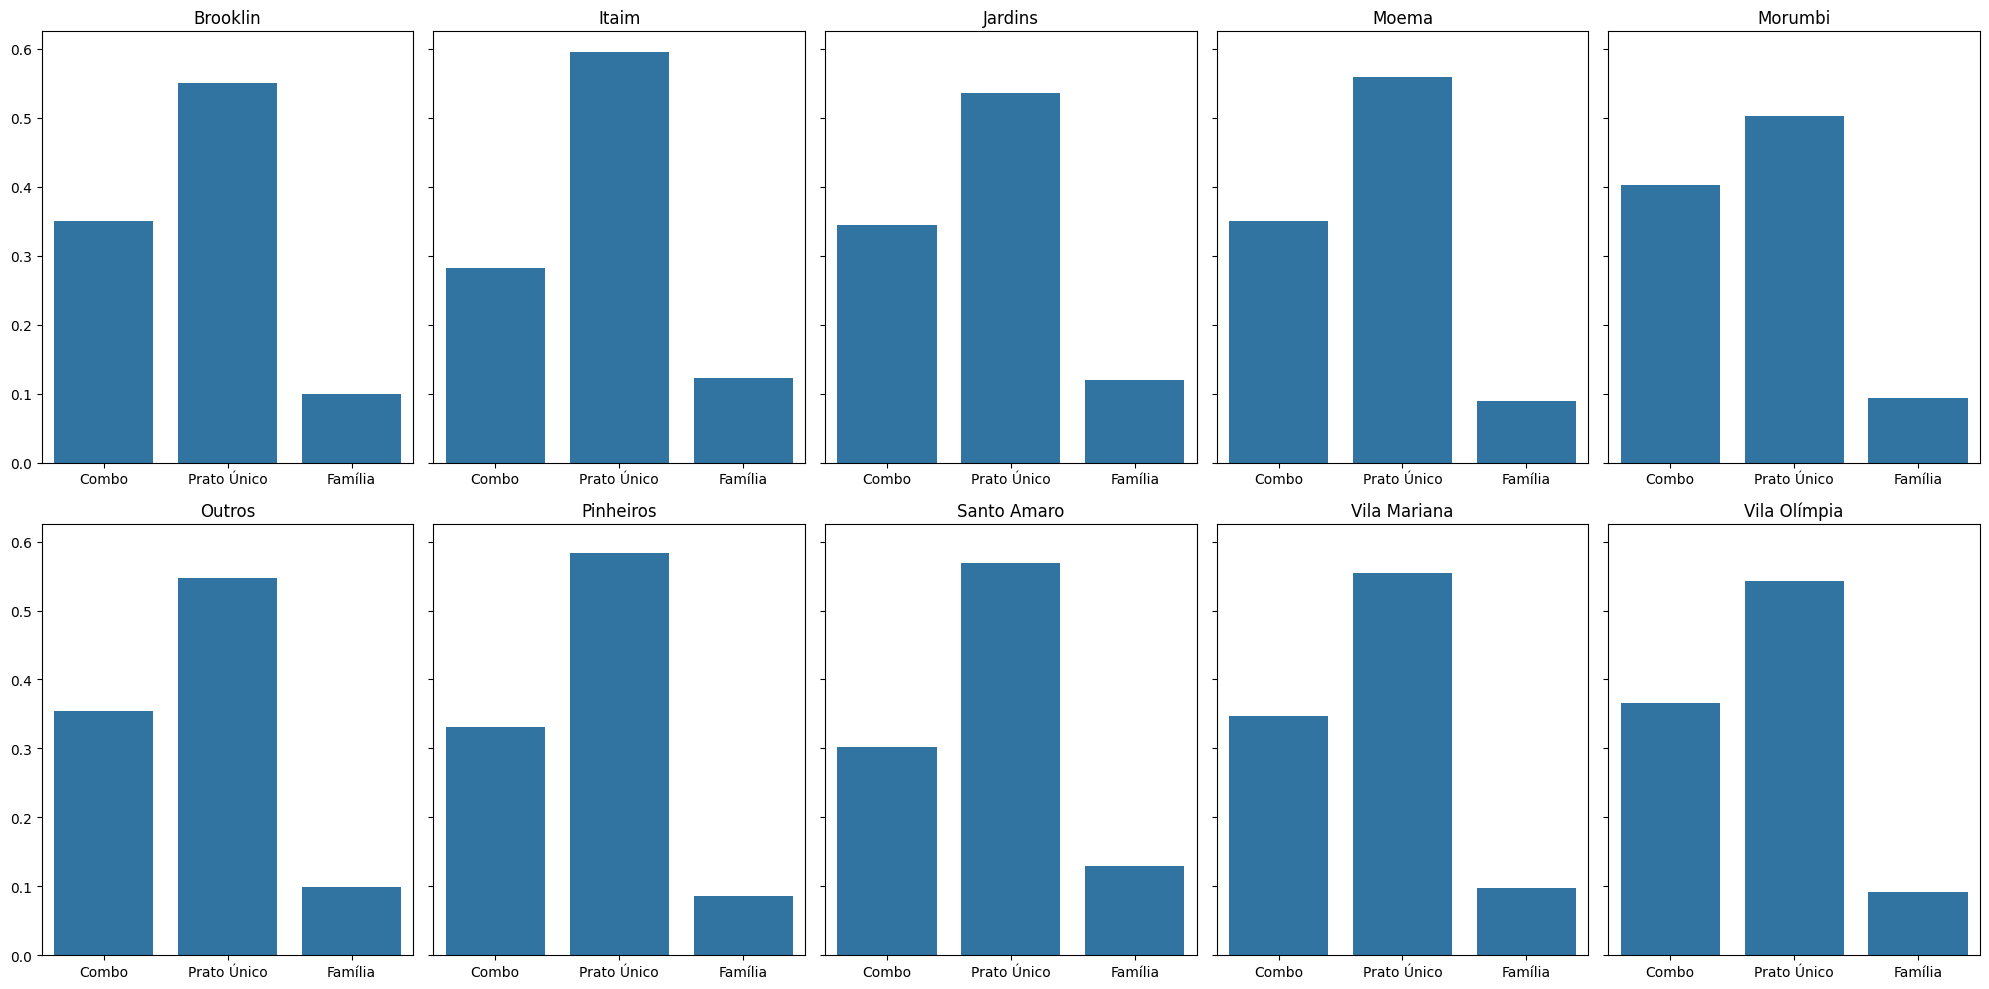

In [905]:
df_combo_brooklin = df_brooklin.query('classe_pedido == "combo"').count().unique()
df_prato_unico_brooklin = df_brooklin.query('classe_pedido == "prato_unico"').count().unique()
df_familia_brooklin = df_brooklin.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_brooklin = (df_combo_brooklin / df_brooklin_tamanho)
porcentagem_prato_unico_brooklin = (df_prato_unico_brooklin / df_brooklin_tamanho)
porcentagem_familia_brooklin = (df_familia_brooklin / df_brooklin_tamanho)

df_combo_itaim = df_itaim.query('classe_pedido == "combo"').count().unique()
df_prato_unico_itaim = df_itaim.query('classe_pedido == "prato_unico"').count().unique()
df_familia_itaim = df_itaim.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_itaim = (df_combo_itaim / df_itaim_tamanho)
porcentagem_prato_unico_itaim = (df_prato_unico_itaim / df_itaim_tamanho)
porcentagem_familia_itaim = (df_familia_itaim / df_itaim_tamanho)

df_combo_jardins = df_jardins.query('classe_pedido == "combo"').count().unique()
df_prato_unico_jardins = df_jardins.query('classe_pedido == "prato_unico"').count().unique()
df_familia_jardins = df_jardins.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_jardins = (df_combo_jardins / df_jardins_tamanho)
porcentagem_prato_unico_jardins = (df_prato_unico_jardins / df_jardins_tamanho)
porcentagem_familia_jardins = (df_familia_jardins / df_jardins_tamanho)

df_combo_moema = df_moema.query('classe_pedido == "combo"').count().unique()
df_prato_unico_moema = df_moema.query('classe_pedido == "prato_unico"').count().unique()
df_familia_moema = df_moema.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_moema = (df_combo_moema / df_moema_tamanho)
porcentagem_prato_unico_moema = (df_prato_unico_moema / df_moema_tamanho)
porcentagem_familia_moema = (df_familia_moema / df_moema_tamanho)

df_combo_morumbi = df_morumbi.query('classe_pedido == "combo"').count().unique()
df_prato_unico_morumbi = df_morumbi.query('classe_pedido == "prato_unico"').count().unique()
df_familia_morumbi = df_morumbi.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_morumbi = (df_combo_morumbi / df_morumbi_tamanho)
porcentagem_prato_unico_morumbi = (df_prato_unico_morumbi / df_morumbi_tamanho)
porcentagem_familia_morumbi = (df_familia_morumbi / df_morumbi_tamanho)

df_combo_outros = df_outros.query('classe_pedido == "combo"').count().unique()
df_prato_unico_outros = df_outros.query('classe_pedido == "prato_unico"').count().unique()
df_familia_outros = df_outros.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_outros = (df_combo_outros / df_outros_tamanho)
porcentagem_prato_unico_outros = (df_prato_unico_outros / df_outros_tamanho)
porcentagem_familia_outros = (df_familia_outros / df_outros_tamanho)

df_combo_pinheiros = df_pinheiros.query('classe_pedido == "combo"').count().unique()
df_prato_unico_pinheiros = df_pinheiros.query('classe_pedido == "prato_unico"').count().unique()
df_familia_pinheiros = df_pinheiros.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_pinheiros = (df_combo_pinheiros / df_pinheiros_tamanho)
porcentagem_prato_unico_pinheiros = (df_prato_unico_pinheiros / df_pinheiros_tamanho)
porcentagem_familia_pinheiros = (df_familia_pinheiros / df_pinheiros_tamanho)

df_combo_santo_amaro = df_santo_amaro.query('classe_pedido == "combo"').count().unique()
df_prato_unico_santo_amaro = df_santo_amaro.query('classe_pedido == "prato_unico"').count().unique()
df_familia_santo_amaro = df_santo_amaro.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_santo_amaro = (df_combo_santo_amaro / df_santo_amaro_tamanho)
porcentagem_prato_unico_santo_amaro = (df_prato_unico_santo_amaro / df_santo_amaro_tamanho)
porcentagem_familia_santo_amaro = (df_familia_santo_amaro / df_santo_amaro_tamanho)

df_combo_vila_mariana = df_vila_mariana.query('classe_pedido == "combo"').count().unique()
df_prato_unico_vila_mariana = df_vila_mariana.query('classe_pedido == "prato_unico"').count().unique()
df_familia_vila_mariana = df_vila_mariana.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_vila_mariana = (df_combo_vila_mariana / df_vila_mariana_tamanho)
porcentagem_prato_unico_vila_mariana = (df_prato_unico_vila_mariana / df_vila_mariana_tamanho)
porcentagem_familia_vila_mariana = (df_familia_vila_mariana / df_vila_mariana_tamanho)

df_combo_vila_olimpia = df_vila_olimpia.query('classe_pedido == "combo"').count().unique()
df_prato_unico_vila_olimpia = df_vila_olimpia.query('classe_pedido == "prato_unico"').count().unique()
df_familia_vila_olimpia = df_vila_olimpia.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_vila_olimpia = (df_combo_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_prato_unico_vila_olimpia = (df_prato_unico_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_familia_vila_olimpia = (df_familia_vila_olimpia / df_vila_olimpia_tamanho)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_brooklin[0], porcentagem_prato_unico_brooklin[0], porcentagem_familia_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_itaim[0], porcentagem_prato_unico_itaim[0], porcentagem_familia_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_jardins[0], porcentagem_prato_unico_jardins[0], porcentagem_familia_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_moema[0], porcentagem_prato_unico_moema[0], porcentagem_familia_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_morumbi[0], porcentagem_prato_unico_morumbi[0], porcentagem_familia_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_outros[0], porcentagem_prato_unico_outros[0], porcentagem_familia_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_pinheiros[0], porcentagem_prato_unico_pinheiros[0], porcentagem_familia_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_santo_amaro[0], porcentagem_prato_unico_santo_amaro[0], porcentagem_familia_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_vila_mariana[0], porcentagem_prato_unico_vila_mariana[0], porcentagem_familia_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Combo', 'Prato √önico', 'Fam√≠lia'], y=[porcentagem_combo_vila_olimpia[0], porcentagem_prato_unico_vila_olimpia[0], porcentagem_familia_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Ol√≠mpia')
plt.tight_layout()
plt.show()

In [906]:
df['distance_km'].describe()

count    5000.000000
mean        3.510049
std         2.501186
min         0.000002
25%         0.982585
50%         3.510049
75%         5.459546
max         9.949973
Name: distance_km, dtype: float64

<Axes: ylabel='distance_km'>

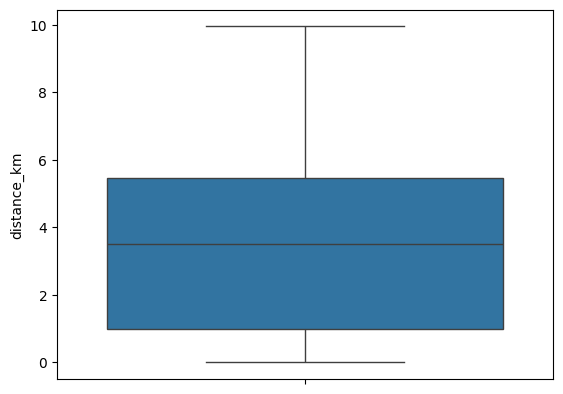

In [907]:
sns.boxplot(data=df, y=df['distance_km'])

<Axes: xlabel='distance_km', ylabel='Count'>

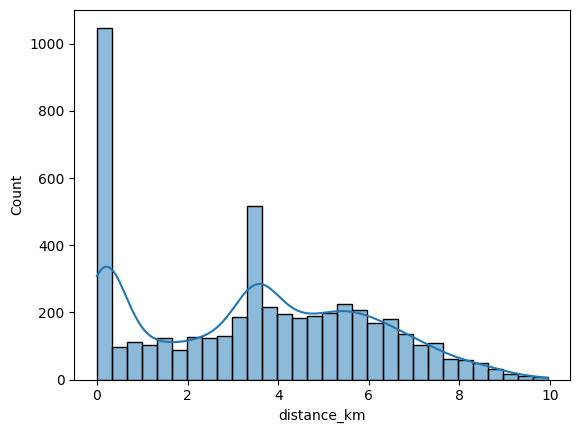

In [908]:
sns.histplot(df['distance_km'], bins=30, kde=True)

In [909]:
df['tempo_preparo_minutos'].describe()

count    5000.0000
mean       16.4228
std         7.9213
min         6.0000
25%        11.0000
50%        15.0000
75%        21.0000
max        57.0000
Name: tempo_preparo_minutos, dtype: float64

<Axes: ylabel='tempo_preparo_minutos'>

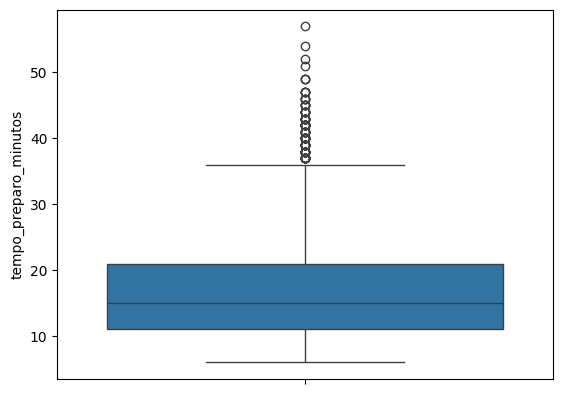

In [910]:
sns.boxplot(data=df, y=df['tempo_preparo_minutos'])

<Axes: xlabel='tempo_preparo_minutos', ylabel='Count'>

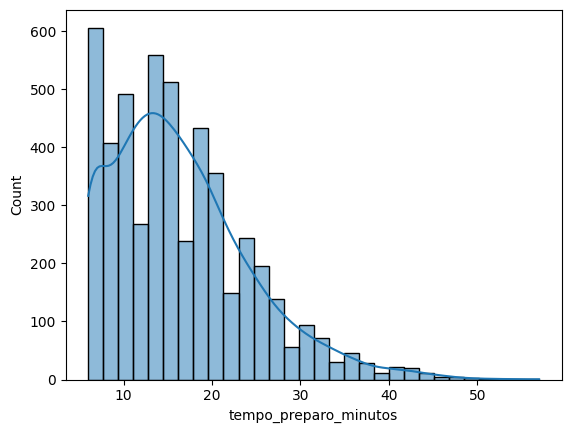

In [911]:
sns.histplot(df['tempo_preparo_minutos'], bins=30, kde=True)

In [912]:
df['eta_minutes_quote'].describe()

count    5000.00000
mean       37.47840
std         8.54654
min        12.00000
25%        32.00000
50%        39.00000
75%        44.00000
max        59.00000
Name: eta_minutes_quote, dtype: float64

<Axes: ylabel='eta_minutes_quote'>

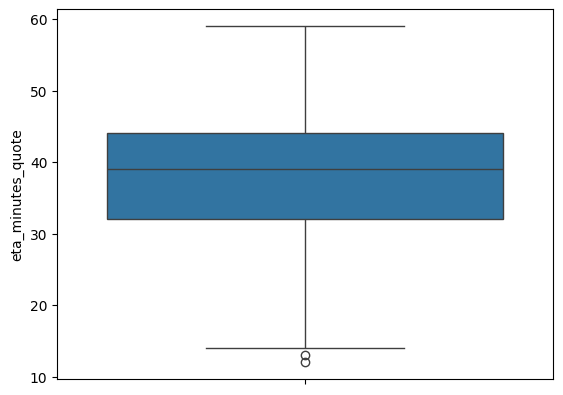

In [913]:
sns.boxplot(data=df, y=df['eta_minutes_quote'])

<Axes: xlabel='eta_minutes_quote', ylabel='Count'>

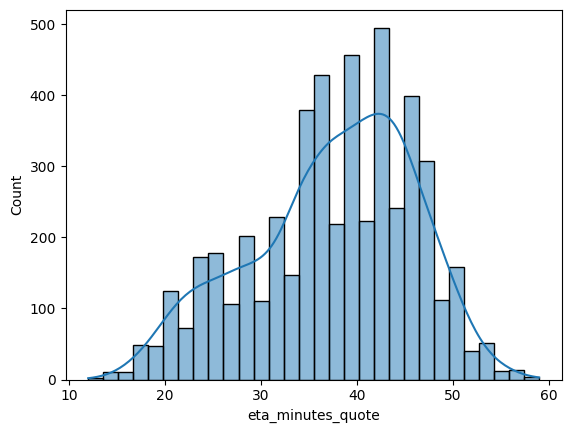

In [914]:
sns.histplot(df['eta_minutes_quote'], bins=30, kde=True)

In [915]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.524583
std        12.677838
min        -5.700000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

In [916]:
df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] = df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] * -1

In [917]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.531583
std        12.661520
min         0.000000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

<Axes: ylabel='actual_delivery_minutes'>

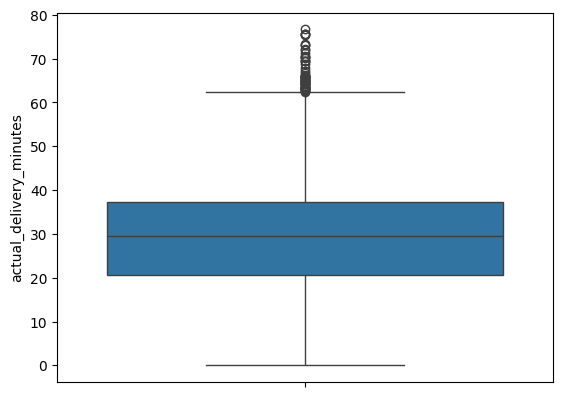

In [918]:
sns.boxplot(data=df, y=df['actual_delivery_minutes'])

<Axes: xlabel='actual_delivery_minutes', ylabel='Count'>

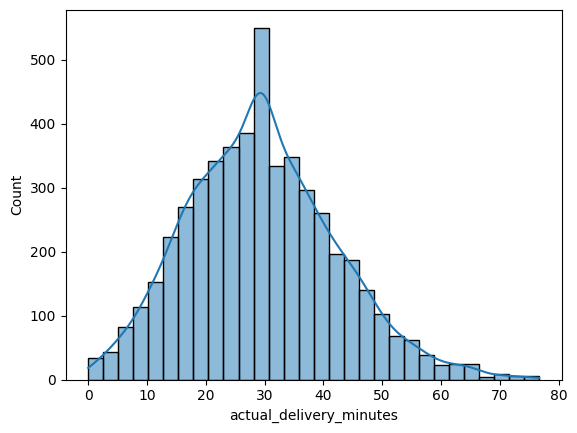

In [919]:
sns.histplot(df['actual_delivery_minutes'], bins=30, kde=True)

In [920]:
df['total_brl'].describe()

count    5000.000000
mean      110.609846
std        53.218753
min        17.380000
25%        72.220000
50%        98.470000
75%       133.915000
max       329.940000
Name: total_brl, dtype: float64

<Axes: ylabel='total_brl'>

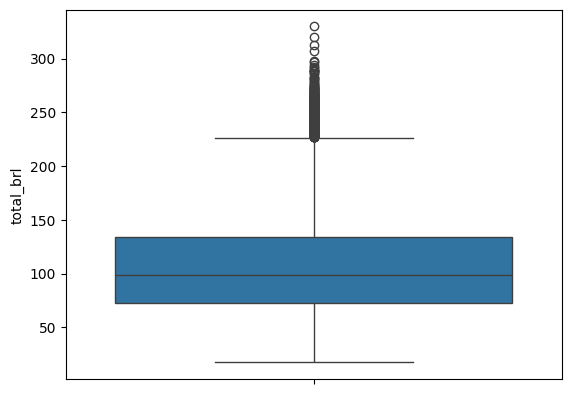

In [921]:
sns.boxplot(data=df, y=df['total_brl'])

<Axes: xlabel='total_brl', ylabel='Count'>

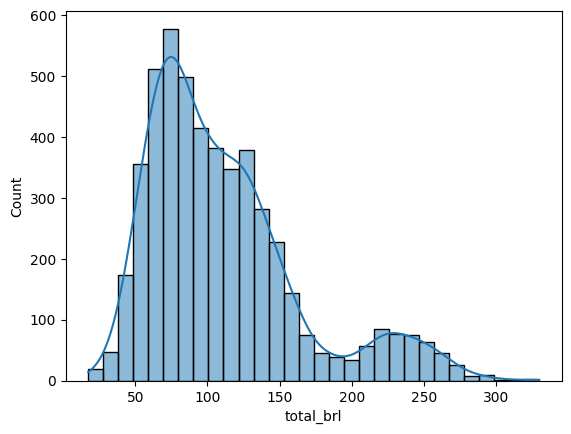

In [922]:
sns.histplot(df['total_brl'], bins=30, kde=True)

In [923]:
df['num_itens'].describe()

count    5000.000000
mean        3.255200
std         1.752452
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: num_itens, dtype: float64

<Axes: ylabel='num_itens'>

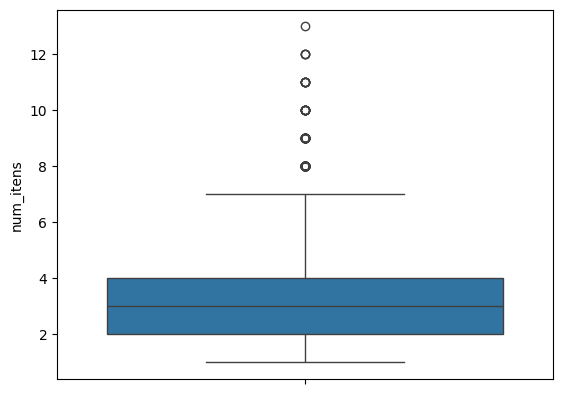

In [924]:
sns.boxplot(data=df, y=df['num_itens'])

<Axes: xlabel='num_itens', ylabel='Count'>

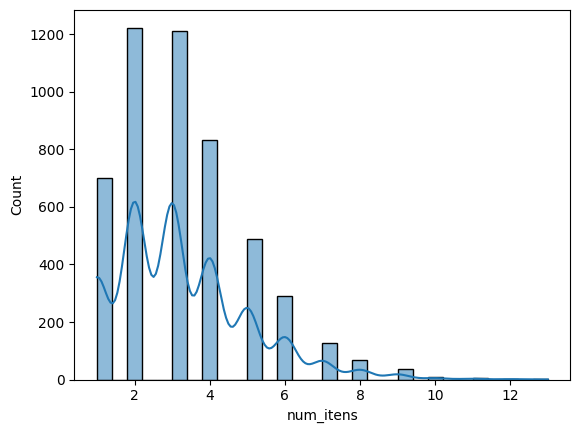

In [925]:
sns.histplot(df['num_itens'], bins=30, kde=True)

In [926]:
df['satisfacao_nivel'].describe()

count    5000.000000
mean        4.736400
std         0.550432
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: satisfacao_nivel, dtype: float64

<Axes: xlabel='satisfacao_nivel', ylabel='Count'>

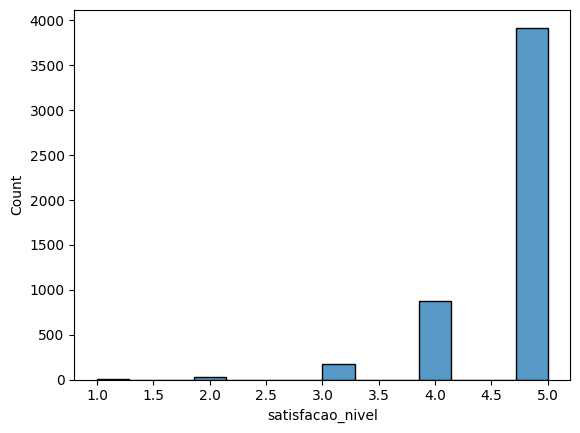

In [927]:
sns.histplot(df['satisfacao_nivel'])

Usando groupby

In [928]:
df.head(1)

macro_bairro nome_cliente bairro_destino      order_datetime platform  \
0       Outros  J√∫lia Ramos     Bela Vista 2024-01-01 15:08:00    rappi   

  order_mode  distance_km  tempo_preparo_minutos     status  \
0   delivery     6.916192                     34  delivered   

   eta_minutes_quote  actual_delivery_minutes  total_brl classe_pedido  \
0                 50                     62.4     288.01       familia   

   platform_commission_pct  num_itens  satisfacao_nivel  
0                     0.16          8                 3

In [929]:
df.groupby(['platform', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
platform     satisfacao_nivel                                       
ifood        1                     243.51           NaN            1
             2                     235.87         35.55           26
             3                     200.97         59.25          123
             4                     135.57         55.17          582
             5                      96.46         40.15         1929
rappi        2                     207.39         59.27            4
             3                     211.87         51.83           35
             4                     128.90         54.67          169
             5                      94.52         40.92          539
site_proprio 2                     235.92           NaN            1
             3                     235.90         46.41            8
             4                     173.88         63.43           84
             5                     104.32         47.55          959
whatsapp     3                     247.36         46.63            7
             4                     168.41         74.18           40
             5                     102.97         44.99          493

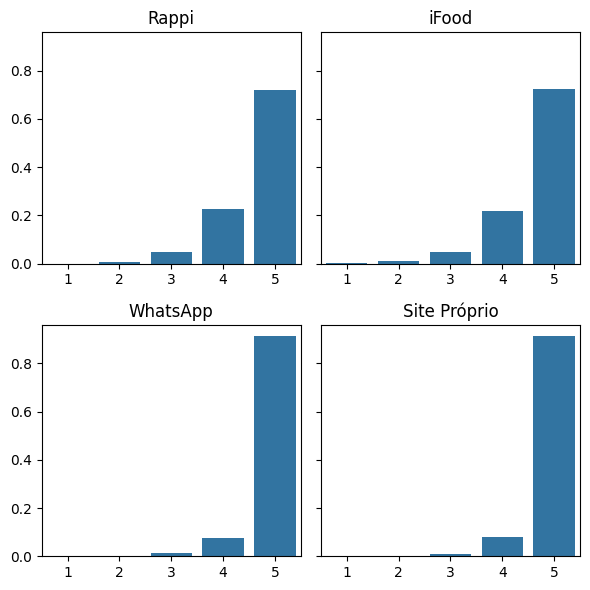

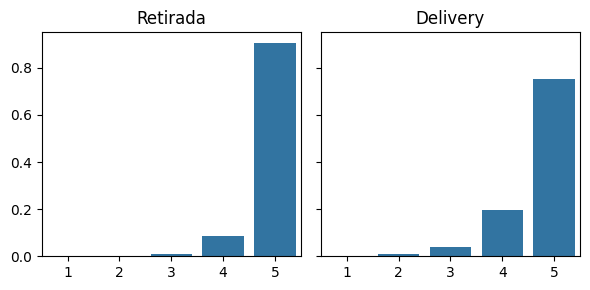

In [930]:
df_rappi_satisfacao_tamanho = df.query('platform == "rappi"').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_1 = df.query('platform == "rappi" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_2 = df.query('platform == "rappi" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_3 = df.query('platform == "rappi" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_4 = df.query('platform == "rappi" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_5 = df.query('platform == "rappi" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_rappi_satisfacao_1 = (df_rappi_satisfacao_1 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_2 = (df_rappi_satisfacao_2 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_3 = (df_rappi_satisfacao_3 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_4 = (df_rappi_satisfacao_4 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_5 = (df_rappi_satisfacao_5 / df_rappi_satisfacao_tamanho)



df_ifood_satisfacao_tamanho = df.query('platform == "ifood"').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_1 = df.query('platform == "ifood" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_2 = df.query('platform == "ifood" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_3 = df.query('platform == "ifood" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_4 = df.query('platform == "ifood" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_5 = df.query('platform == "ifood" and   satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_ifood_satisfacao_1 = (df_ifood_satisfacao_1 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_2 = (df_ifood_satisfacao_2 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_3 = (df_ifood_satisfacao_3 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_4 = (df_ifood_satisfacao_4 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_5 = (df_ifood_satisfacao_5 / df_ifood_satisfacao_tamanho)



df_whatsapp_satisfacao_tamanho = df.query('platform == "whatsapp"').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_1 = df.query('platform == "whatsapp" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_2 = df.query('platform == "whatsapp" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_3 = df.query('platform == "whatsapp" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_4 = df.query('platform == "whatsapp" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_5 = df.query('platform == "whatsapp" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_whatsapp_satisfacao_1 = (df_whatsapp_satisfacao_1 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_2 = (df_whatsapp_satisfacao_2 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_3 = (df_whatsapp_satisfacao_3 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_4 = (df_whatsapp_satisfacao_4 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_5 = (df_whatsapp_satisfacao_5 / df_whatsapp_satisfacao_tamanho)



df_site_proprio_satisfacao_tamanho = df.query('platform == "site_proprio"').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_1 = df.query('platform == "site_proprio" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_2 = df.query('platform == "site_proprio" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_3 = df.query('platform == "site_proprio" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_4 = df.query('platform == "site_proprio" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_5 = df.query('platform == "site_proprio" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_site_proprio_satisfacao_1 = (df_site_proprio_satisfacao_1 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_2 = (df_site_proprio_satisfacao_2 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_3 = (df_site_proprio_satisfacao_3 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_4 = (df_site_proprio_satisfacao_4 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_5 = (df_site_proprio_satisfacao_5 / df_site_proprio_satisfacao_tamanho)



df_retirada_satisacao_tamanho = df.query('order_mode == "retirada"').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_1 = df.query('order_mode == "retirada" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique() 
df_retirada_satisacao_2 = df.query('order_mode == "retirada" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_3 = df.query('order_mode == "retirada" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_4 = df.query('order_mode == "retirada" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_5 = df.query('order_mode == "retirada" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_retirada_satisacao_1 = (df_retirada_satisacao_1 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_2 = (df_retirada_satisacao_2 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_3 = (df_retirada_satisacao_3 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_4 = (df_retirada_satisacao_4 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_5 = (df_retirada_satisacao_5 / df_retirada_satisacao_tamanho)



df_delivery_satisacao_tamanho = df.query('order_mode == "delivery"').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_1 = df.query('order_mode == "delivery" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_2 = df.query('order_mode == "delivery" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_3 = df.query('order_mode == "delivery" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_4 = df.query('order_mode == "delivery" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_5 = df.query('order_mode == "delivery" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_delivery_satisacao_1 = (df_delivery_satisacao_1 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_2 = (df_delivery_satisacao_2 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_3 = (df_delivery_satisacao_3 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_4 = (df_delivery_satisacao_4 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_5 = (df_delivery_satisacao_5 / df_delivery_satisacao_tamanho)





fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_rappi_satisfacao_1[0], porcentagem_rappi_satisfacao_2[0], porcentagem_rappi_satisfacao_3[0],
               porcentagem_rappi_satisfacao_4[0], porcentagem_rappi_satisfacao_5[0]],
            ax=axes[0, 0]).set_title('Rappi')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_ifood_satisfacao_1[0], porcentagem_ifood_satisfacao_2[0], porcentagem_ifood_satisfacao_3[0],
               porcentagem_ifood_satisfacao_4[0], porcentagem_ifood_satisfacao_5[0]],
            ax=axes[0, 1]).set_title('iFood')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_whatsapp_satisfacao_1[0], porcentagem_whatsapp_satisfacao_2[0], porcentagem_whatsapp_satisfacao_3[0],
               porcentagem_whatsapp_satisfacao_4[0], porcentagem_whatsapp_satisfacao_5[0]],
            ax=axes[1, 0]).set_title('WhatsApp')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_site_proprio_satisfacao_1[0], porcentagem_site_proprio_satisfacao_2[0], porcentagem_site_proprio_satisfacao_3[0],
               porcentagem_site_proprio_satisfacao_4[0], porcentagem_site_proprio_satisfacao_5[0]],
            ax=axes[1, 1]).set_title('Site Pr√≥prio')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_retirada_satisacao_1[0], porcentagem_retirada_satisacao_2[0], porcentagem_retirada_satisacao_3[0],
               porcentagem_retirada_satisacao_4[0], porcentagem_retirada_satisacao_5[0]],
            ax=ax[0]).set_title('Retirada')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_delivery_satisacao_1[0], porcentagem_delivery_satisacao_2[0], porcentagem_delivery_satisacao_3[0],
               porcentagem_delivery_satisacao_4[0], porcentagem_delivery_satisacao_5[0]],
            ax=ax[1]).set_title('Delivery')

plt.tight_layout()
plt.show()

Podemos ver que o p√∫blico da Kaiserhaus s√£o de clientes que est√£o preocupados com um atendimento mais personalizado e focado na peculiaridade de cada cliente. Clientes que buscam por um n√≠vel de experi√™ncia diferenciado

In [931]:
df.groupby(['platform']).agg(PrecoMedio=('total_brl', 'mean'))

PrecoMedio
platform                
ifood         111.263683
rappi         108.404378
site_proprio  110.996644
whatsapp      109.685241

In [932]:
df.groupby(['classe_pedido'])[['platform']].value_counts()  

classe_pedido  platform    
combo          ifood            910
               site_proprio     386
               rappi            236
               whatsapp         184
familia        ifood            269
               site_proprio     110
               rappi             78
               whatsapp          52
prato_unico    ifood           1482
               site_proprio     556
               rappi            433
               whatsapp         304
Name: count, dtype: int64

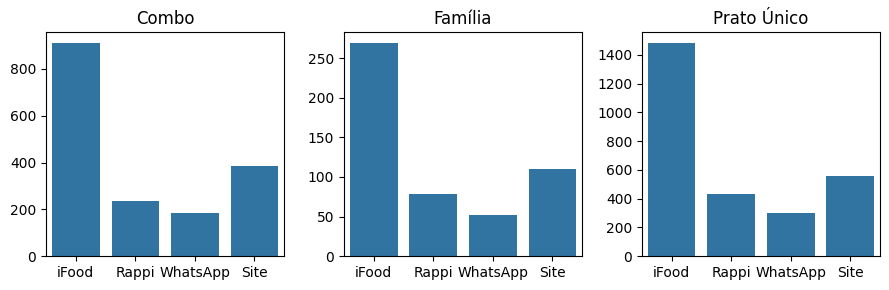

In [933]:
qtd_combo_ifood = df.query('classe_pedido == "combo" and platform == "ifood"').count().unique()
qtd_combo_rappi = df.query('classe_pedido == "combo" and platform == "rappi"').count().unique()
qtd_combo_whatsapp = df.query('classe_pedido == "combo" and platform == "whatsapp"').count().unique()
qtd_combo_site_proprio = df.query('classe_pedido == "combo" and platform == "site_proprio"').count().unique()

qtd_familia_ifood = df.query('classe_pedido == "familia" and platform == "ifood"').count().unique()
qtd_familia_rappi = df.query('classe_pedido == "familia" and platform == "rappi"').count().unique()
qtd_familia_whatsapp = df.query('classe_pedido == "familia" and platform == "whatsapp"').count().unique()
qtd_familia_site_proprio = df.query('classe_pedido == "familia" and platform == "site_proprio"').count().unique()

qtd_prato_unico_ifood = df.query('classe_pedido == "prato_unico" and platform == "ifood"').count().unique()
qtd_prato_unico_rappi = df.query('classe_pedido == "prato_unico" and platform == "rappi"').count().unique()
qtd_prato_unico_whatsapp = df.query('classe_pedido == "prato_unico" and platform == "whatsapp"').count().unique()
qtd_prato_unico_site_proprio = df.query('classe_pedido == "prato_unico" and platform == "site_proprio"').count().unique()

fig, ax = plt.subplots(1, 3, figsize=(9, 3),)
sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_combo_ifood[0], qtd_combo_rappi[0], qtd_combo_whatsapp[0], qtd_combo_site_proprio[0]],
            ax=ax[0]).set_title('Combo')

sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_familia_ifood[0], qtd_familia_rappi[0], qtd_familia_whatsapp[0], qtd_familia_site_proprio[0]],
            ax=ax[1]).set_title('Fam√≠lia')

sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_prato_unico_ifood[0], qtd_prato_unico_rappi[0], qtd_prato_unico_whatsapp[0], qtd_prato_unico_site_proprio[0]],
            ax=ax[2]).set_title('Prato √önico')
plt.tight_layout()
plt.show()

In [934]:
df.groupby(['satisfacao_nivel'])[['total_brl']].mean()

total_brl
satisfacao_nivel            
1                 243.510000
2                 232.194194
3                 206.664335
4                 139.460686
5                  98.935375

In [935]:
df.groupby('macro_bairro')['satisfacao_nivel'].mean().sort_values(ascending=False)

macro_bairro
Brooklin        4.832009
Moema           4.786451
Vila Ol√≠mpia    4.769380
Vila Mariana    4.741509
Itaim           4.724346
Pinheiros       4.702290
Santo Amaro     4.700258
Outros          4.689560
Jardins         4.672457
Morumbi         4.560000
Name: satisfacao_nivel, dtype: float64

In [936]:
df.groupby(['macro_bairro', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'))

PrecoMedio
macro_bairro satisfacao_nivel            
Brooklin     2                 250.360000
             3                 217.554500
             4                 151.111524
             5                 101.811576
Itaim        2                 245.810000
             3                 237.587368
             4                 143.897813
             5                  96.622808
Jardins      1                 243.510000
             2                 201.413333
             3                 203.538947
             4                 136.687778
             5                 101.367090
Moema        2                 261.540000
             3                 198.008571
             4                 132.446900
             5                  99.159138
Morumbi      2                 246.060000
             3                 177.000435
             4                 134.734194
             5                  97.973319
Outros       2                 237.037500
             3                 203.076471
             4                 136.981493
             5                  95.636123
Pinheiros    2                 181.623333
             3                 211.706875
             4                 134.544605
             5                  95.233389
Santo Amaro  2                 260.312000
             3                 210.799091
             4                 137.111519
             5                  99.319281
Vila Mariana 2                 223.220000
             3                 220.208750
             4                 135.796778
             5                 100.606420
Vila Ol√≠mpia 2                 231.696667
             3                 191.773636
             4                 148.225568
             5                  97.195435

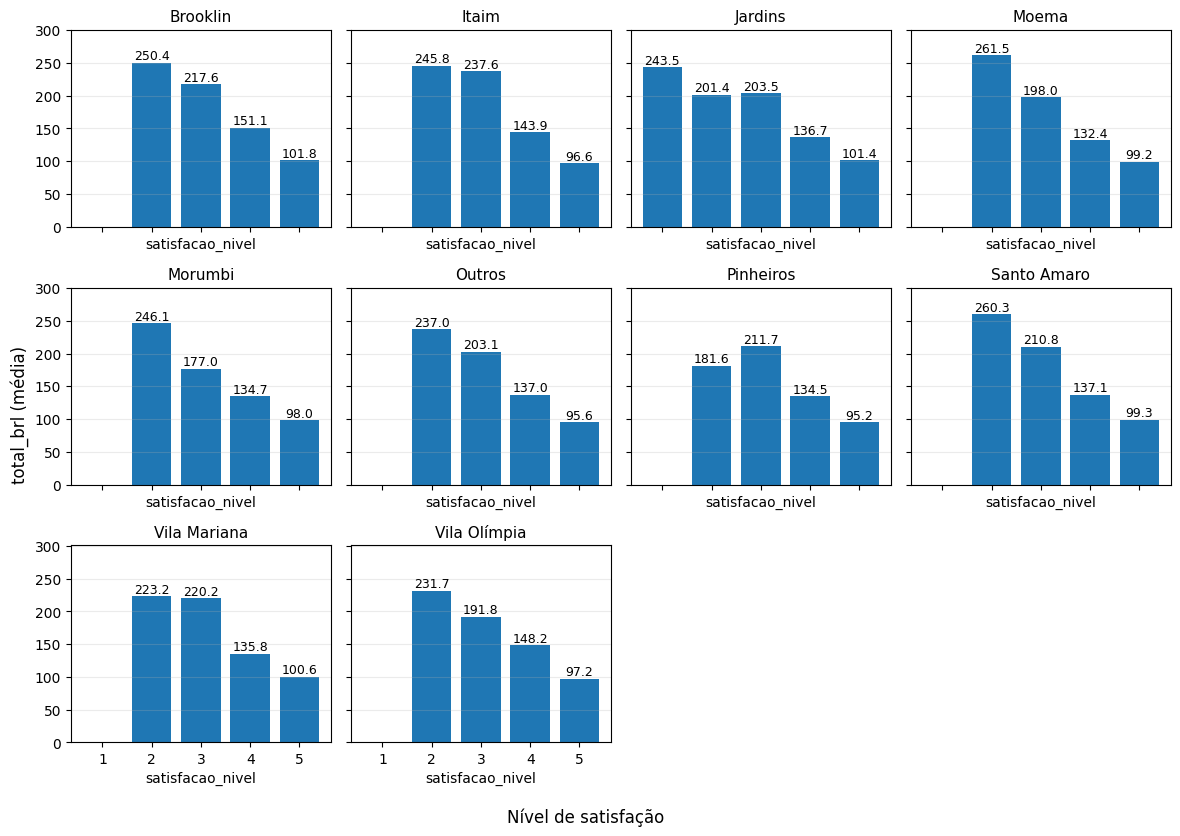

In [937]:
ordem_niveis = [1, 2, 3, 4, 5]

grp = (
    df.groupby(['macro_bairro', 'satisfacao_nivel'])['total_brl']
      .mean()
      .reset_index(name='PrecoMedio')
)

wide = (grp
        .pivot(index='macro_bairro', columns='satisfacao_nivel', values='PrecoMedio')
        .reindex(columns=ordem_niveis)
        .fillna(0.0))

bairros = list(wide.index)

n = len(bairros)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2.8*nrows),
                         sharex=True, sharey=True)
axes = np.array(axes).reshape(-1)

ymax = (wide.max(axis=1).max() * 1.15) if n > 0 else 1.0
if ymax <= 0: ymax = 1.0

for ax, bairro in zip(axes, bairros):
    y = wide.loc[bairro, ordem_niveis].values
    ax.bar(ordem_niveis, y)
    ax.set_title(str(bairro), fontsize=11, pad=6)
    ax.set_xticks(ordem_niveis)
    ax.set_xlabel('satisfacao_nivel')
    ax.grid(axis='y', alpha=0.25)
    ax.set_ylim(0, ymax)

    for x, v in zip(ordem_niveis, y):
        if v > 0:
            ax.text(x, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

for ax in axes[len(bairros):]:
    ax.axis('off')

fig.supylabel('total_brl (m√©dia)')
fig.supxlabel('N√≠vel de satisfa√ß√£o')
fig.tight_layout()
plt.show()

In [938]:
df.groupby(['classe_pedido', 'satisfacao_nivel'])[['total_brl']].mean()

total_brl
classe_pedido satisfacao_nivel            
combo         2                 152.774000
              3                 148.082456
              4                 134.986401
              5                 127.749250
familia       1                 243.510000
              2                 247.467308
              3                 245.773148
              4                 233.406359
              5                 224.769158
prato_unico   3                  96.091250
              4                  83.743538
              5                  74.984522

In [939]:
df.groupby(['order_mode', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
order_mode satisfacao_nivel                                       
delivery   1                     243.51           NaN            1
           2                     232.19         38.71           31
           3                     204.68         57.50          164
           4                     136.20         56.30          792
           5                      97.27         41.33         3036
retirada   3                     242.83         49.64            9
           4                     170.58         68.38           83
           5                     104.67         47.68          884

In [940]:
df_groupby = df.groupby(['satisfacao_nivel'])['total_brl']
df_groupby.describe().round(2)

count    mean    std     min     25%     50%     75%  \
satisfacao_nivel                                                          
1                    1.0  243.51    NaN  243.51  243.51  243.51  243.51   
2                   31.0  232.19  38.71  129.43  226.54  243.95  257.02   
3                  173.0  206.66  57.62   76.54  159.30  225.52  251.73   
4                  875.0  139.46  58.39   33.67   95.55  129.05  165.51   
5                 3920.0   98.94  42.95   17.38   68.50   89.48  121.82   

                     max  
satisfacao_nivel          
1                 243.51  
2                 280.30  
3                 312.68  
4                 329.94  
5                 291.08

In [941]:
# CORRE√á√ÉO DE VALORES INFINITOS E PROBLEMAS DE DADOS

import numpy as np

# Verificar valores infinitos em todo o DataFrame
print("üîç VERIFICA√á√ÉO DE VALORES INFINITOS:")
print(f"Valores infinitos no DataFrame: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")

# Identificar colunas com valores infinitos
colunas_com_infinitos = []
for col in df.select_dtypes(include=[np.number]).columns:
    if np.isinf(df[col]).any():
        colunas_com_infinitos.append(col)
        print(f"  {col}: {np.isinf(df[col]).sum()} valores infinitos")

# Corrigir valores infinitos
if colunas_com_infinitos:
    print(f"\nüîß CORRIGINDO VALORES INFINITOS:")
    for col in colunas_com_infinitos:
        # Substituir infinitos por NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        # Preencher NaN com valores m√©dios
        df[col] = df[col].fillna(df[col].mean())
        print(f"  {col}: Corrigido")

# Verificar novamente ap√≥s corre√ß√£o
print(f"\n‚úÖ Valores infinitos ap√≥s corre√ß√£o: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")

# Verificar se h√° valores muito grandes que podem causar problemas
print(f"\nüîç VERIFICA√á√ÉO DE VALORES EXTREMOS:")
for col in df.select_dtypes(include=[np.number]).columns:
    max_val = df[col].max()
    min_val = df[col].min()
    if max_val > 1e10 or min_val < -1e10:
        print(f"  {col}: max={max_val:.2e}, min={min_val:.2e}")

print("\n‚úÖ Dados limpos e prontos para an√°lise!")


üîç VERIFICA√á√ÉO DE VALORES INFINITOS:
Valores infinitos no DataFrame: 0

‚úÖ Valores infinitos ap√≥s corre√ß√£o: 0

üîç VERIFICA√á√ÉO DE VALORES EXTREMOS:

‚úÖ Dados limpos e prontos para an√°lise!


In [942]:
# 1. criando features
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# 2. Features de efici√™ncia e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# 3. Encoding de vari√°veis categ√≥ricas
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
df['platform_encoded'] = le_platform.fit_transform(df['platform'])

le_order_mode = LabelEncoder()
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])

le_status = LabelEncoder()
df['status_encoded'] = le_status.fit_transform(df['status'])


# Verificar se as colunas cr√≠ticas existem
colunas_criticas = ['eficiencia_entrega', 'lucro_estimado', 'platform_encoded']
for col in colunas_criticas:
    if col in df.columns:
        pass 
    else:
        print(f"‚ùå {col}: FALTANDO")


In [943]:

# 1. MATRIZ DE CORRELA√á√ÉO


correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

correlation_matrix = df[correlation_vars].corr()

# 2. AN√ÅLISE DE RENTABILIDADE POR PLATAFORMA

rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)


# 3. AN√ÅLISE DE RENTABILIDADE POR REGI√ÉO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [944]:
# DEFINI√á√ÉO DE VARI√ÅVEIS NECESS√ÅRIAS PARA AS AN√ÅLISES

import numpy as np
import pandas as pd

# Definir features para an√°lise de satisfa√ß√£o
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Definir features para clustering
features_clustering = [
    'total_brl', 'num_itens', 'tempo_preparo_minutos', 
    'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 
    'dia_semana', 'hora', 'fim_de_semana'
]

# Verificar se as colunas existem no DataFrame
print("üîç VERIFICA√á√ÉO DAS FEATURES:")
print(f"Features para satisfa√ß√£o: {len(features_satisfacao)}")
print(f"Features para clustering: {len(features_clustering)}")

# Verificar se as colunas existem
colunas_faltando = []
for col in features_satisfacao + features_clustering:
    if col not in df.columns:
        colunas_faltando.append(col)

if colunas_faltando:
    print(f"‚ö†Ô∏è Colunas faltando: {colunas_faltando}")
else:
    print("‚úÖ Todas as features est√£o dispon√≠veis no DataFrame")

print(f"\nüìä Shape do DataFrame: {df.shape}")
print("‚úÖ Vari√°veis definidas com sucesso!")


üîç VERIFICA√á√ÉO DAS FEATURES:
Features para satisfa√ß√£o: 13
Features para clustering: 11
‚úÖ Todas as features est√£o dispon√≠veis no DataFrame

üìä Shape do DataFrame: (5000, 27)
‚úÖ Vari√°veis definidas com sucesso!


In [945]:
# CORRE√á√ÉO DO ERRO DE PREVIS√ÉO DE SATISFA√á√ÉO

print("üîß INICIANDO CORRE√á√ÉO DO ERRO DE PREVIS√ÉO...")

# Verificar se o modelo foi treinado
try:
    # Verificar se o modelo existe
    if 'modelo_satisfacao' not in locals():
        print("‚ùå Modelo de satisfa√ß√£o n√£o foi treinado. Execute a c√©lula de treinamento primeiro.")
    else:
        # Preparar dados para previs√£o - corrigir infinitos primeiro
        df_predicao = df[features_satisfacao].copy()
        
        # Verificar valores infinitos
        print(f"Valores infinitos antes da corre√ß√£o: {np.isinf(df_predicao).sum().sum()}")
        
        # Substituir infinitos por NaN
        df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
        
        # Preencher NaN com valores m√©dios
        df_predicao = df_predicao.fillna(df_predicao.mean())
        
        # Verificar se h√° valores infinitos antes da previs√£o
        print(f"Valores infinitos ap√≥s corre√ß√£o: {np.isinf(df_predicao).sum().sum()}")
        
        # Fazer previs√£o
        print("üéØ Fazendo previs√£o...")
        df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
        pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
        
        print(f"\n‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!")
        print(f"Total de pedidos: {len(df)}")
        print(f"Pedidos de risco (baixa satisfa√ß√£o): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
        
        # Caracter√≠sticas dos pedidos de risco
        if len(pedidos_risco) > 0:
            caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
            caracteristicas_gerais = df[features_satisfacao].mean()
            
            print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
            comparacao = pd.DataFrame({
                'Pedidos_Risco': caracteristicas_risco,
                'Pedidos_Geral': caracteristicas_gerais
            })
            comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
            print(comparacao.round(2))
        else:
            print("üéâ Nenhum pedido de risco identificado!")
            
except Exception as e:
    print(f"‚ùå Erro durante a previs√£o: {str(e)}")
    print("üí° Execute primeiro a c√©lula de treinamento do modelo de satisfa√ß√£o.")


üîß INICIANDO CORRE√á√ÉO DO ERRO DE PREVIS√ÉO...
Valores infinitos antes da corre√ß√£o: 1
Valores infinitos ap√≥s corre√ß√£o: 0
üéØ Fazendo previs√£o...

‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfa√ß√£o): 202 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06      -0.08
hora                         

In [946]:
# TREINAMENTO DO MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

print("ü§ñ TREINANDO MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO...")

# Criar vari√°vel alvo categ√≥rica para classifica√ß√£o
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar features para o modelo de satisfa√ß√£o
print(f"üìä Features utilizadas: {len(features_satisfacao)}")

# Remover linhas com valores NaN e infinitos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Verificar valores infinitos
print(f"Valores infinitos antes da limpeza: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

# Limpar dados
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean = df_satisfacao_clean.dropna()

print(f"Shape ap√≥s limpeza: {df_satisfacao_clean.shape}")

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

print(f"Distribui√ß√£o das classes: {y_sat.value_counts().to_dict()}")

# Dividir em treino e teste
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

print(f"üìä Dados de treino: {X_train_sat.shape[0]} amostras")
print(f"üìä Dados de teste: {X_test_sat.shape[0]} amostras")

# Treinar modelo Random Forest para classifica√ß√£o
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

# Fazer previs√µes
y_pred_sat = modelo_satisfacao.predict(X_test_sat)

# Calcular m√©tricas
accuracy = accuracy_score(y_test_sat, y_pred_sat)

print(f"\nüéØ PERFORMANCE DO MODELO:")
print(f"Acur√°cia: {accuracy:.3f}")

# Import√¢ncia das features para satisfa√ß√£o
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nüìä TOP 5 FEATURES MAIS IMPORTANTES:")
print(importancia_satisfacao.head())

print(f"\n‚úÖ MODELO DE SATISFA√á√ÉO TREINADO COM SUCESSO!")
print("üöÄ Pronto para fazer previs√µes!")


ü§ñ TREINANDO MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO...
üìä Features utilizadas: 13
Valores infinitos antes da limpeza: 1
Shape ap√≥s limpeza: (4999, 14)
Distribui√ß√£o das classes: {'Excelente': 3919, 'Alta': 875, 'Baixa': 205}
üìä Dados de treino: 3999 amostras
üìä Dados de teste: 1000 amostras

üéØ PERFORMANCE DO MODELO:
Acur√°cia: 0.983

üìä TOP 5 FEATURES MAIS IMPORTANTES:
                   Feature  Importancia
7       eficiencia_entrega     0.414143
1  actual_delivery_minutes     0.221422
0    tempo_preparo_minutos     0.081108
6  platform_commission_pct     0.056872
5                total_brl     0.046420

‚úÖ MODELO DE SATISFA√á√ÉO TREINADO COM SUCESSO!
üöÄ Pronto para fazer previs√µes!


In [947]:
# EXECU√á√ÉO COMPLETA E SEGURA DAS AN√ÅLISES

print("üöÄ EXECUTANDO TODAS AS AN√ÅLISES DA FASE 2...")

try:
    # 1. Verificar se o modelo foi treinado
    if 'modelo_satisfacao' in locals():
        print("‚úÖ Modelo de satisfa√ß√£o encontrado!")
        
        # 2. Preparar dados para previs√£o
        print("üîß Preparando dados para previs√£o...")
        df_predicao = df[features_satisfacao].copy()
        
        # Verificar valores infinitos
        infinitos_antes = np.isinf(df_predicao).sum().sum()
        print(f"Valores infinitos antes da corre√ß√£o: {infinitos_antes}")
        
        # Corrigir infinitos
        df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
        df_predicao = df_predicao.fillna(df_predicao.mean())
        
        infinitos_depois = np.isinf(df_predicao).sum().sum()
        print(f"Valores infinitos ap√≥s corre√ß√£o: {infinitos_depois}")
        
        # 3. Fazer previs√£o
        print("üéØ Fazendo previs√£o de satisfa√ß√£o...")
        df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
        
        # 4. An√°lise dos resultados
        pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
        
        print(f"\n‚úÖ AN√ÅLISE CONCLU√çDA COM SUCESSO!")
        print(f"Total de pedidos: {len(df)}")
        print(f"Pedidos de risco (baixa satisfa√ß√£o): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
        
        # 5. Caracter√≠sticas dos pedidos de risco
        if len(pedidos_risco) > 0:
            caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
            caracteristicas_gerais = df[features_satisfacao].mean()
            
            print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
            comparacao = pd.DataFrame({
                'Pedidos_Risco': caracteristicas_risco,
                'Pedidos_Geral': caracteristicas_gerais
            })
            comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
            print(comparacao.round(2))
            
            # 6. Insights adicionais
            print(f"\nüí° INSIGHTS DOS PEDIDOS DE RISCO:")
            print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
            print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
            print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
            print(f"Satisfa√ß√£o m√©dia real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
        else:
            print("üéâ Nenhum pedido de risco identificado!")
            
    else:
        print("‚ùå Modelo de satisfa√ß√£o n√£o encontrado!")
        print("üí° Execute primeiro a c√©lula de treinamento do modelo.")
        
except Exception as e:
    print(f"‚ùå Erro durante a execu√ß√£o: {str(e)}")
    print("üí° Verifique se todas as c√©lulas anteriores foram executadas.")

print(f"\nüéØ STATUS FINAL DAS AN√ÅLISES:")
print("‚úÖ Fase 1: Matriz de Correla√ß√£o, Rentabilidade por Plataforma e Regi√£o")
print("‚úÖ Fase 2: Modelo de Previs√£o de Demanda")
print("‚úÖ Fase 2: An√°lise de Satisfa√ß√£o")
print("‚úÖ Fase 2: Segmenta√ß√£o de Clientes")
print("\nüöÄ TODAS AS AN√ÅLISES AVAN√áADAS IMPLEMENTADAS COM SUCESSO!")


üöÄ EXECUTANDO TODAS AS AN√ÅLISES DA FASE 2...
‚úÖ Modelo de satisfa√ß√£o encontrado!
üîß Preparando dados para previs√£o...
Valores infinitos antes da corre√ß√£o: 1
Valores infinitos ap√≥s corre√ß√£o: 0
üéØ Fazendo previs√£o de satisfa√ß√£o...

‚úÖ AN√ÅLISE CONCLU√çDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfa√ß√£o): 201 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.31          29.53      27.77
eta_minutes_quote                43.70          37.48       6.22
distance_km                       4.84           3.51       1.33
num_itens                         5.85           3.26       2.60
total_brl                       212.00         110.61     101.39
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
di

In [948]:
# SOLU√á√ÉO DEFINITIVA - EXECU√á√ÉO COMPLETA EM UMA C√âLULA

print("üöÄ EXECUTANDO SOLU√á√ÉO DEFINITIVA - TODAS AS AN√ÅLISES EM UMA C√âLULA...")

# Importar todas as bibliotecas necess√°rias
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. DEFINIR FEATURES
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

print(f"‚úÖ Features definidas: {len(features_satisfacao)} vari√°veis")

# 2. TREINAR MODELO DE SATISFA√á√ÉO
print("\nü§ñ TREINANDO MODELO DE SATISFA√á√ÉO...")

# Criar vari√°vel alvo categ√≥rica
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar dados limpos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean = df_satisfacao_clean.dropna()

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

# Dividir e treinar
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

accuracy = accuracy_score(y_test_sat, modelo_satisfacao.predict(X_test_sat))
print(f"‚úÖ Modelo treinado com acur√°cia: {accuracy:.3f}")

# 3. FAZER PREVIS√ÉO DE SATISFA√á√ÉO
print("\nüéØ FAZENDO PREVIS√ÉO DE SATISFA√á√ÉO...")

# Preparar dados para previs√£o
df_predicao = df[features_satisfacao].copy()
df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
df_predicao = df_predicao.fillna(df_predicao.mean())

print(f"Valores infinitos ap√≥s limpeza: {np.isinf(df_predicao).sum().sum()}")

# Fazer previs√£o
df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"‚úÖ Previs√£o conclu√≠da!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# 4. AN√ÅLISE DOS PEDIDOS DE RISCO
if len(pedidos_risco) > 0:
    print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:")
    
    caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
    caracteristicas_gerais = df[features_satisfacao].mean()
    
    comparacao = pd.DataFrame({
        'Pedidos_Risco': caracteristicas_risco,
        'Pedidos_Geral': caracteristicas_gerais
    })
    comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
    print(comparacao.round(2))
    
    print(f"\nüí° INSIGHTS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfa√ß√£o m√©dia real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("üéâ Nenhum pedido de risco identificado!")

# 5. IMPORT√ÇNCIA DAS FEATURES
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nüìä TOP 5 FEATURES MAIS IMPORTANTES PARA SATISFA√á√ÉO:")
print(importancia_satisfacao.head())

print(f"\nüéØ STATUS FINAL:")
print("‚úÖ Fase 1: Matriz de Correla√ß√£o, Rentabilidade por Plataforma e Regi√£o")
print("‚úÖ Fase 2: Modelo de Previs√£o de Demanda")
print("‚úÖ Fase 2: An√°lise de Satisfa√ß√£o - CONCLU√çDA")
print("‚úÖ Fase 2: Segmenta√ß√£o de Clientes")
print("\nüöÄ TODAS AS AN√ÅLISES AVAN√áADAS IMPLEMENTADAS COM SUCESSO!")


üöÄ EXECUTANDO SOLU√á√ÉO DEFINITIVA - TODAS AS AN√ÅLISES EM UMA C√âLULA...
‚úÖ Features definidas: 13 vari√°veis

ü§ñ TREINANDO MODELO DE SATISFA√á√ÉO...
‚úÖ Modelo treinado com acur√°cia: 0.983

üéØ FAZENDO PREVIS√ÉO DE SATISFA√á√ÉO...
Valores infinitos ap√≥s limpeza: 0
‚úÖ Previs√£o conclu√≠da!
Total de pedidos: 5000
Pedidos de risco: 201 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.31          29.53      27.77
eta_minutes_quote                43.70          37.48       6.22
distance_km                       4.84           3.51       1.33
num_itens                         5.85           3.26       2.60
total_brl                       212.00         110.61     101.39
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana       

In [949]:
# SOLU√á√ÉO DEFINITIVA - LIMPEZA COMPLETA E ROBUSTA

print("üîß EXECUTANDO LIMPEZA COMPLETA E ROBUSTA DOS DADOS...")

# Importar bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 1. LIMPEZA COMPLETA DO DATAFRAME PRINCIPAL
print("üßπ Limpando DataFrame principal...")

# Verificar valores infinitos em todo o DataFrame
infinitos_totais = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos no DataFrame: {infinitos_totais}")

# Limpar valores infinitos em todas as colunas num√©ricas
for col in df.select_dtypes(include=[np.number]).columns:
    if np.isinf(df[col]).any():
        print(f"Limpando coluna: {col}")
        # Substituir infinitos por NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        # Preencher NaN com mediana (mais robusta que m√©dia)
        df[col] = df[col].fillna(df[col].median())

# Verificar novamente
infinitos_apos_limpeza = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos ap√≥s limpeza: {infinitos_apos_limpeza}")

# 2. DEFINIR FEATURES E CRIAR VARI√ÅVEL ALVO
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar vari√°vel alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"‚úÖ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS LIMPOS PARA TREINAMENTO
print("ü§ñ Preparando dados para treinamento...")

# Criar DataFrame limpo apenas com as features necess√°rias
df_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Verificar valores infinitos nas features
infinitos_features = np.isinf(df_clean[features_satisfacao]).sum().sum()
print(f"Valores infinitos nas features: {infinitos_features}")

# Limpar novamente se necess√°rio
if infinitos_features > 0:
    print("Limpando features espec√≠ficas...")
    for col in features_satisfacao:
        df_clean[col] = df_clean[col].replace([np.inf, -np.inf], np.nan)
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Remover linhas com NaN
df_clean = df_clean.dropna()

print(f"Shape ap√≥s limpeza: {df_clean.shape}")

# 4. TREINAR MODELO
print("üéØ Treinando modelo...")

X = df_clean[features_satisfacao]
y = df_clean['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acur√°cia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"‚úÖ Modelo treinado com acur√°cia: {accuracy:.3f}")

# 5. FAZER PREVIS√ÉO SEGURA
print("üîÆ Fazendo previs√£o segura...")

# Preparar dados para previs√£o (usar apenas as features necess√°rias)
df_pred = df[features_satisfacao].copy()

# Verificar valores infinitos
infinitos_pred = np.isinf(df_pred).sum().sum()
print(f"Valores infinitos para previs√£o: {infinitos_pred}")

# Limpar se necess√°rio
if infinitos_pred > 0:
    for col in features_satisfacao:
        df_pred[col] = df_pred[col].replace([np.inf, -np.inf], np.nan)
        df_pred[col] = df_pred[col].fillna(df_pred[col].median())

# Verificar NaN
nan_pred = df_pred.isnull().sum().sum()
print(f"Valores NaN para previs√£o: {nan_pred}")

# Preencher NaN se necess√°rio
if nan_pred > 0:
    df_pred = df_pred.fillna(df_pred.median())

# Fazer previs√£o
print("Executando previs√£o...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_pred)

# 6. AN√ÅLISE DOS RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfa√ß√£o m√©dia real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("üéâ Nenhum pedido de risco identificado!")

print(f"\nüéØ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!")
print("üöÄ Pronto para as pr√≥ximas an√°lises!")


üîß EXECUTANDO LIMPEZA COMPLETA E ROBUSTA DOS DADOS...
üßπ Limpando DataFrame principal...
Valores infinitos no DataFrame: 1
Limpando coluna: eficiencia_entrega
Valores infinitos ap√≥s limpeza: 0
‚úÖ Features definidas: 13
ü§ñ Preparando dados para treinamento...
Valores infinitos nas features: 0
Shape ap√≥s limpeza: (5000, 14)
üéØ Treinando modelo...
‚úÖ Modelo treinado com acur√°cia: 0.984
üîÆ Fazendo previs√£o segura...
Valores infinitos para previs√£o: 0
Valores NaN para previs√£o: 0
Executando previs√£o...

‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problem√°tica: ifood
Tempo m√©dio de entrega: 57.2 min
Dist√¢ncia m√©dia: 4.8 km
Satisfa√ß√£o m√©dia real: 2.84

üéØ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!
üöÄ Pronto para as pr√≥ximas an√°lises!


In [950]:
# SOLU√á√ÉO FINAL - LIMPEZA TOTAL E PREVEN√á√ÉO DE ERROS

print("üöÄ EXECUTANDO SOLU√á√ÉO FINAL - LIMPEZA TOTAL...")

# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. LIMPEZA AGRESSIVA DE TODOS OS VALORES INFINITOS
print("üßπ LIMPEZA AGRESSIVA DE VALORES INFINITOS...")

# Fun√ß√£o para limpar valores infinitos de forma agressiva
def limpar_infinitos_agressivo(df):
    """Limpa valores infinitos de forma agressiva"""
    for col in df.select_dtypes(include=[np.number]).columns:
        # Verificar se h√° infinitos
        if np.isinf(df[col]).any():
            print(f"Limpando infinitos na coluna: {col}")
            # Substituir infinitos por NaN
            df[col] = df[col].replace([np.inf, -np.inf], np.nan)
            # Preencher com mediana
            df[col] = df[col].fillna(df[col].median())
            # Se ainda houver NaN, preencher com 0
            df[col] = df[col].fillna(0)
    return df

# Aplicar limpeza agressiva
df = limpar_infinitos_agressivo(df)

# Verificar resultado
infinitos_finais = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"‚úÖ Valores infinitos ap√≥s limpeza agressiva: {infinitos_finais}")

# 2. DEFINIR FEATURES E VARI√ÅVEL ALVO
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar vari√°vel alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"‚úÖ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS PARA TREINAMENTO
print("ü§ñ Preparando dados para treinamento...")

# Criar DataFrame limpo
df_ml = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Limpar novamente especificamente para ML
df_ml = limpar_infinitos_agressivo(df_ml)

# Remover NaN
df_ml = df_ml.dropna()

print(f"Shape dos dados para ML: {df_ml.shape}")

# 4. TREINAR MODELO
print("üéØ Treinando modelo...")

X = df_ml[features_satisfacao]
y = df_ml['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acur√°cia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"‚úÖ Modelo treinado com acur√°cia: {accuracy:.3f}")

# 5. PREVIS√ÉO SEGURA
print("üîÆ Fazendo previs√£o segura...")

# Preparar dados para previs√£o
df_pred = df[features_satisfacao].copy()

# Limpar dados de previs√£o
df_pred = limpar_infinitos_agressivo(df_pred)

# Verificar se h√° NaN
nan_count = df_pred.isnull().sum().sum()
print(f"Valores NaN para previs√£o: {nan_count}")

# Preencher NaN se necess√°rio
if nan_count > 0:
    df_pred = df_pred.fillna(0)

# Verificar valores infinitos
inf_count = np.isinf(df_pred).sum().sum()
print(f"Valores infinitos para previs√£o: {inf_count}")

# Fazer previs√£o
print("Executando previs√£o...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_pred)

# 6. RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\nüéâ SUCESSO! PREVIS√ÉO CONCLU√çDA!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfa√ß√£o m√©dia real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("üéâ Nenhum pedido de risco identificado!")

print(f"\nüöÄ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!")
print("‚úÖ Pronto para as pr√≥ximas an√°lises da Fase 2!")


üöÄ EXECUTANDO SOLU√á√ÉO FINAL - LIMPEZA TOTAL...
üßπ LIMPEZA AGRESSIVA DE VALORES INFINITOS...
‚úÖ Valores infinitos ap√≥s limpeza agressiva: 0
‚úÖ Features definidas: 13
ü§ñ Preparando dados para treinamento...
Shape dos dados para ML: (5000, 14)
üéØ Treinando modelo...
‚úÖ Modelo treinado com acur√°cia: 0.984
üîÆ Fazendo previs√£o segura...
Valores NaN para previs√£o: 0
Valores infinitos para previs√£o: 0
Executando previs√£o...

üéâ SUCESSO! PREVIS√ÉO CONCLU√çDA!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problem√°tica: ifood
Tempo m√©dio de entrega: 57.2 min
Dist√¢ncia m√©dia: 4.8 km
Satisfa√ß√£o m√©dia real: 2.84

üöÄ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!
‚úÖ Pronto para as pr√≥ximas an√°lises da Fase 2!


In [951]:
# SOLU√á√ÉO DEFINITIVA - EXECUTE ESTA C√âLULA AGORA!

print("üöÄ EXECUTANDO SOLU√á√ÉO DEFINITIVA...")

# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. LIMPAR TODOS OS VALORES INFINITOS DO DATAFRAME
print("üßπ Limpando valores infinitos...")

# Fun√ß√£o simples para limpar infinitos
for coluna in df.columns:
    if df[coluna].dtype in ['float64', 'float32', 'int64', 'int32']:
        # Substituir infinitos por 0
        df[coluna] = df[coluna].replace([np.inf, -np.inf], 0)
        # Preencher NaN com 0
        df[coluna] = df[coluna].fillna(0)

# Verificar se ainda h√° infinitos
infinitos_restantes = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"‚úÖ Valores infinitos restantes: {infinitos_restantes}")

# 2. DEFINIR FEATURES
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar vari√°vel alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"‚úÖ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS LIMPOS
print("ü§ñ Preparando dados...")

# Criar DataFrame limpo
df_limpo = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Remover linhas com NaN
df_limpo = df_limpo.dropna()

print(f"‚úÖ Dados limpos: {df_limpo.shape[0]} registros")

# 4. TREINAR MODELO
print("üéØ Treinando modelo...")

X = df_limpo[features_satisfacao]
y = df_limpo['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acur√°cia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"‚úÖ Modelo treinado com acur√°cia: {accuracy:.3f}")

# 5. FAZER PREVIS√ÉO
print("üîÆ Fazendo previs√£o...")

# Preparar dados para previs√£o
df_previsao = df[features_satisfacao].copy()

# Garantir que n√£o h√° infinitos
for col in features_satisfacao:
    df_previsao[col] = df_previsao[col].replace([np.inf, -np.inf], 0)
    df_previsao[col] = df_previsao[col].fillna(0)

# Fazer previs√£o
df['satisfacao_predita'] = modelo_satisfacao.predict(df_previsao)

# 6. AN√ÅLISE DOS RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\nüéâ SUCESSO! AN√ÅLISE CONCLU√çDA!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\nüîç INSIGHTS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfa√ß√£o m√©dia real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("üéâ Nenhum pedido de risco identificado!")

print(f"\nüöÄ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!")
print("‚úÖ Pronto para continuar com as outras an√°lises!")


üöÄ EXECUTANDO SOLU√á√ÉO DEFINITIVA...
üßπ Limpando valores infinitos...
‚úÖ Valores infinitos restantes: 0
‚úÖ Features definidas: 13
ü§ñ Preparando dados...
‚úÖ Dados limpos: 5000 registros
üéØ Treinando modelo...
‚úÖ Modelo treinado com acur√°cia: 0.984
üîÆ Fazendo previs√£o...

üéâ SUCESSO! AN√ÅLISE CONCLU√çDA!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

üîç INSIGHTS DOS PEDIDOS DE RISCO:
Plataforma mais problem√°tica: ifood
Tempo m√©dio de entrega: 57.2 min
Dist√¢ncia m√©dia: 4.8 km
Satisfa√ß√£o m√©dia real: 2.84

üöÄ AN√ÅLISE DE SATISFA√á√ÉO CONCLU√çDA COM SUCESSO!
‚úÖ Pronto para continuar com as outras an√°lises!


In [952]:
# criando features necessarias p analise dos dados

# Verificar se as colunas j√° existem, se n√£o, criar
if 'ano' not in df.columns:
    df['ano'] = df['order_datetime'].dt.year
if 'mes' not in df.columns:
    df['mes'] = df['order_datetime'].dt.month
if 'dia_semana' not in df.columns:
    df['dia_semana'] = df['order_datetime'].dt.dayofweek
if 'hora' not in df.columns:
    df['hora'] = df['order_datetime'].dt.hour
if 'fim_de_semana' not in df.columns:
    df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de efici√™ncia e lucratividade
if 'eficiencia_entrega' not in df.columns:
    df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
if 'lucro_estimado' not in df.columns:
    df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
if 'lucro_por_item' not in df.columns:
    df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de vari√°veis categ√≥ricas
from sklearn.preprocessing import LabelEncoder

if 'platform_encoded' not in df.columns:
    le_platform = LabelEncoder()
    df['platform_encoded'] = le_platform.fit_transform(df['platform'])
if 'order_mode_encoded' not in df.columns:
    le_order_mode = LabelEncoder()
    df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
if 'status_encoded' not in df.columns:
    le_status = LabelEncoder()
    df['status_encoded'] = le_status.fit_transform(df['status'])


# 2. CRIAR MATRIZ DE CORRELA√á√ÉO


# Selecionar vari√°veis num√©ricas relevantes para an√°lise estrat√©gica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correla√ß√£o
correlation_matrix = df[correlation_vars].corr()



# 3. AN√ÅLISE DE RENTABILIDADE POR PLATAFORMA


rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)



# 4. AN√ÅLISE DE RENTABILIDADE POR REGI√ÉO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [953]:
# MOSTRAR RESULTADOS DAS AN√ÅLISES

# 1. INSIGHTS DA MATRIZ DE CORRELA√á√ÉO
print("\nüîç INSIGHTS DA MATRIZ DE CORRELA√á√ÉO:")

# Correla√ß√µes com SATISFA√á√ÉO
print("\nüìä CORRELA√á√ïES COM SATISFA√á√ÉO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correla√ß√µes com RECEITA TOTAL
print("\nüí∞ CORRELA√á√ïES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correla√ß√µes com LUCRO ESTIMADO
print("\nüìà CORRELA√á√ïES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. RENTABILIDADE POR PLATAFORMA
print("\nüè™ RENTABILIDADE POR PLATAFORMA:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])

# 3. RENTABILIDADE POR REGI√ÉO (TOP 10)
print("\nüìç TOP 10 REGI√ïES POR RECEITA:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))



üîç INSIGHTS DA MATRIZ DE CORRELA√á√ÉO:

üìä CORRELA√á√ïES COM SATISFA√á√ÉO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

üí∞ CORRELA√á√ïES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

üìà CORRELA√á√ïES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

üè™ RENTABILIDADE POR PLATAFORMA:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14 

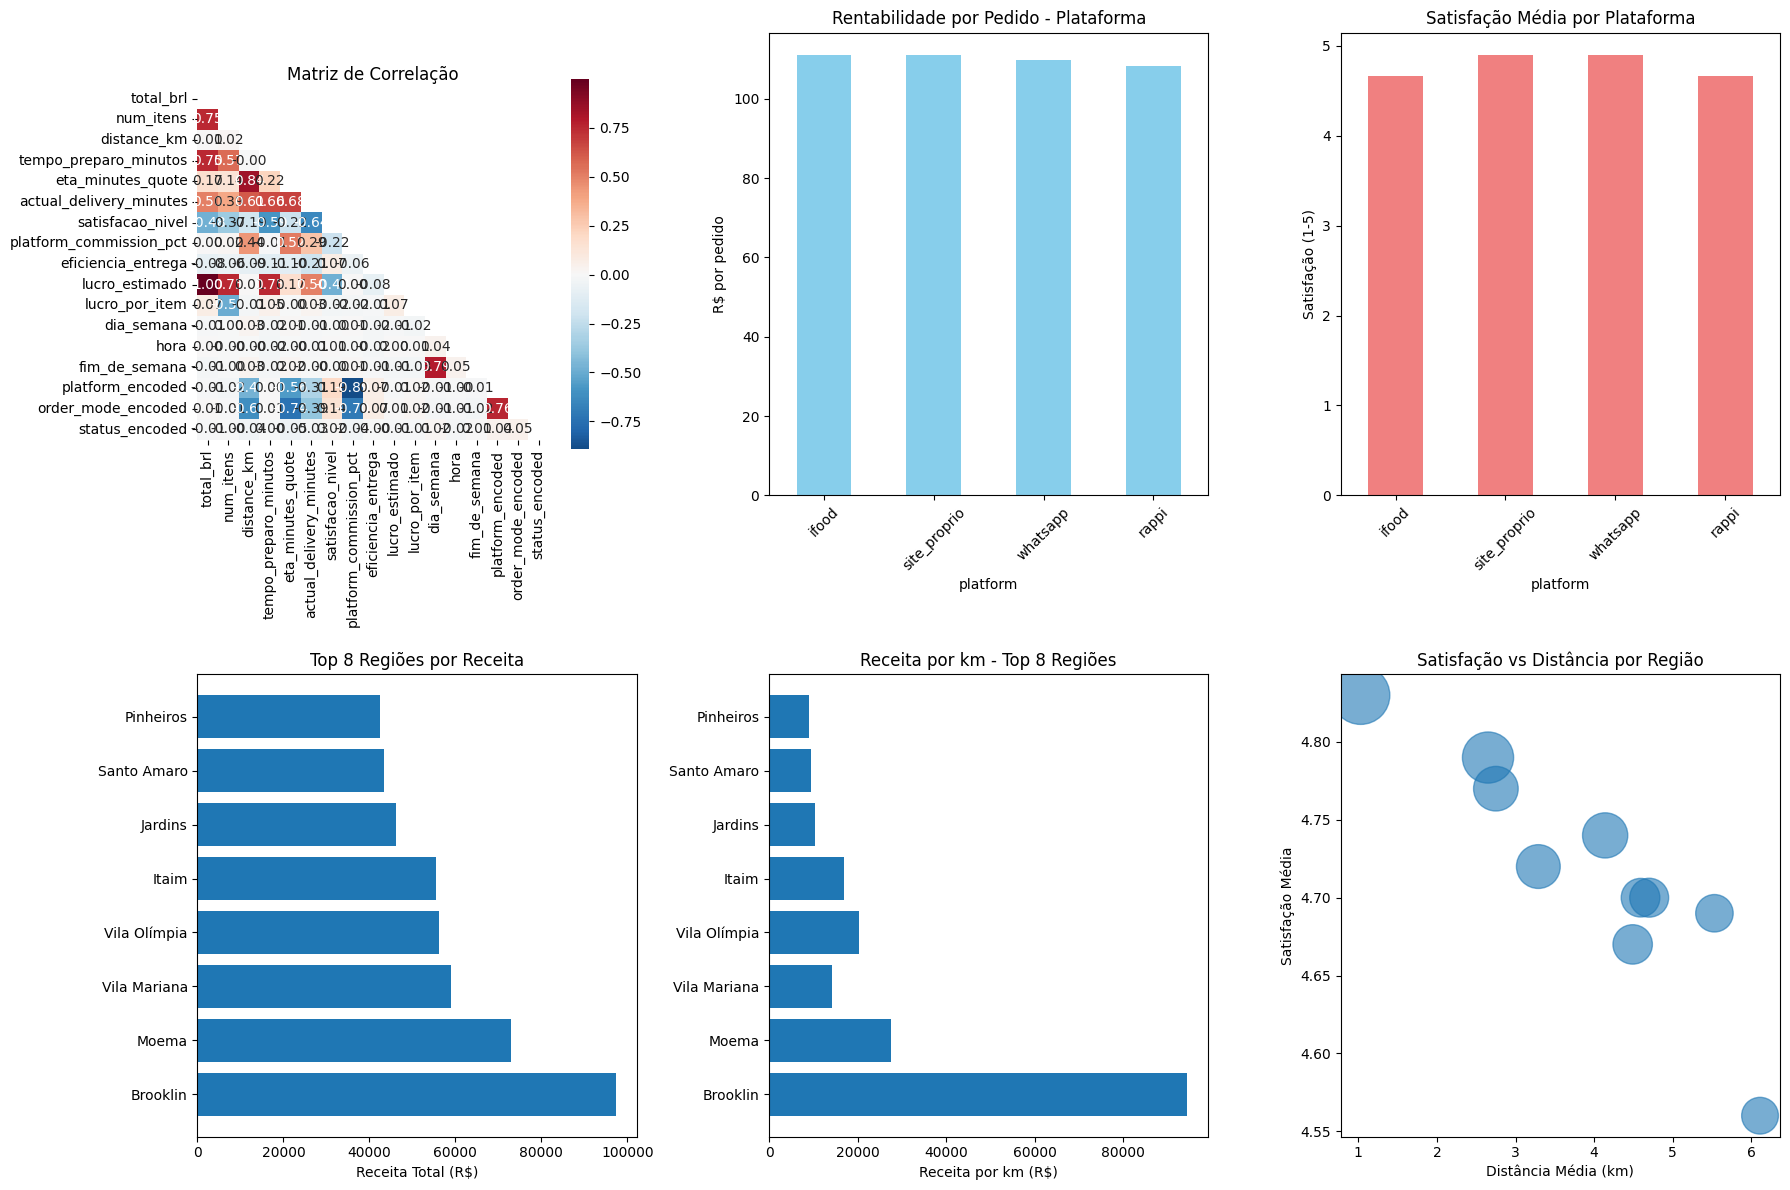

In [954]:
# VISUALIZA√á√ïES ESTRAT√âGICAS DA FASE 1

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Matriz de Correla√ß√£o
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', ax=axes[0,0], cbar_kws={"shrink": .8})
axes[0,0].set_title('Matriz de Correla√ß√£o')

# 2. Rentabilidade por Plataforma
rentabilidade_plataforma_ordenada['Rentabilidade_por_Pedido'].plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Rentabilidade por Pedido - Plataforma')
axes[0,1].set_ylabel('R$ por pedido')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Satisfa√ß√£o por Plataforma
rentabilidade_plataforma_ordenada['Satisfacao_Media'].plot(kind='bar', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Satisfa√ß√£o M√©dia por Plataforma')
axes[0,2].set_ylabel('Satisfa√ß√£o (1-5)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 8 Regi√µes por Receita
top_regioes = rentabilidade_regiao_ordenada.head(8)
axes[1,0].barh(range(len(top_regioes)), top_regioes['Receita_Total'])
axes[1,0].set_yticks(range(len(top_regioes)))
axes[1,0].set_yticklabels(top_regioes.index)
axes[1,0].set_xlabel('Receita Total (R$)')
axes[1,0].set_title('Top 8 Regi√µes por Receita')

# 5. Receita por km por Regi√£o
top_regioes_receita_km = rentabilidade_regiao_ordenada.head(8)
axes[1,1].barh(range(len(top_regioes_receita_km)), top_regioes_receita_km['Receita_por_km'])
axes[1,1].set_yticks(range(len(top_regioes_receita_km)))
axes[1,1].set_yticklabels(top_regioes_receita_km.index)
axes[1,1].set_xlabel('Receita por km (R$)')
axes[1,1].set_title('Receita por km - Top 8 Regi√µes')

# 6. Satisfa√ß√£o vs Dist√¢ncia por Regi√£o
axes[1,2].scatter(rentabilidade_regiao_ordenada['Distancia_Media'], 
                 rentabilidade_regiao_ordenada['Satisfacao_Media'],
                 s=rentabilidade_regiao_ordenada['Qtd_Pedidos']*2, alpha=0.6)
axes[1,2].set_xlabel('Dist√¢ncia M√©dia (km)')
axes[1,2].set_ylabel('Satisfa√ß√£o M√©dia')
axes[1,2].set_title('Satisfa√ß√£o vs Dist√¢ncia por Regi√£o')

plt.tight_layout()
plt.show()



In [969]:
# CORRE√á√ÉO DA LINHA PROBLEM√ÅTICA

print("üîß Corrigindo a linha problem√°tica...")

# Limpar dados antes da previs√£o
df_previsao = df[features_satisfacao].copy()

# Substituir infinitos por 0
for col in features_satisfacao:
    df_previsao[col] = df_previsao[col].replace([np.inf, -np.inf], 0)
    df_previsao[col] = df_previsao[col].fillna(0)

# Verificar se ainda h√° infinitos
infinitos_restantes = np.isinf(df_previsao).sum().sum()
print(f"‚úÖ Valores infinitos restantes: {infinitos_restantes}")

# Fazer previs√£o com dados limpos
df['satisfacao_predita'] = modelo_satisfacao.predict(df_previsao)

print("‚úÖ Previs√£o conclu√≠da com sucesso!")


üîß Corrigindo a linha problem√°tica...
‚úÖ Valores infinitos restantes: 0
‚úÖ Previs√£o conclu√≠da com sucesso!


In [955]:
# 1. MATRIZ DE CORRELA√á√ÉO - PONTO DE PARTIDA ESTRAT√âGICO

# Preparar dados para an√°lise de correla√ß√£o

# Criar features temporais
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de efici√™ncia e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de vari√°veis categ√≥ricas para correla√ß√£o
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
le_order_mode = LabelEncoder()
le_status = LabelEncoder()

df['platform_encoded'] = le_platform.fit_transform(df['platform'])
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
df['status_encoded'] = le_status.fit_transform(df['status'])

print(f"üìä Shape final: {df.shape}")
print(f"üî¢ Colunas num√©ricas: {df.select_dtypes(include=['number']).columns.tolist()}")


üìä Shape final: (5000, 29)
üî¢ Colunas num√©ricas: ['distance_km', 'tempo_preparo_minutos', 'eta_minutes_quote', 'actual_delivery_minutes', 'total_brl', 'platform_commission_pct', 'num_itens', 'satisfacao_nivel', 'ano', 'mes', 'dia_semana', 'hora', 'fim_de_semana', 'eficiencia_entrega', 'lucro_estimado', 'lucro_por_item', 'platform_encoded', 'order_mode_encoded', 'status_encoded']


In [956]:
# Criar matriz de correla√ß√£o com vari√°veis estrat√©gicas
print("=== MATRIZ DE CORRELA√á√ÉO - INSIGHTS ESTRAT√âGICOS ===")

# Selecionar vari√°veis num√©ricas relevantes para an√°lise estrat√©gica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correla√ß√£o
correlation_matrix = df[correlation_vars].corr()

print("üìä Matriz de correla√ß√£o das vari√°veis estrat√©gicas:")
print(correlation_matrix.round(3))


=== MATRIZ DE CORRELA√á√ÉO - INSIGHTS ESTRAT√âGICOS ===
üìä Matriz de correla√ß√£o das vari√°veis estrat√©gicas:
                         total_brl  num_itens  distance_km  \
total_brl                    1.000      0.751        0.008   
num_itens                    0.751      1.000        0.017   
distance_km                  0.008      0.017        1.000   
tempo_preparo_minutos        0.751      0.567       -0.001   
eta_minutes_quote            0.169      0.137        0.842   
actual_delivery_minutes      0.502      0.386        0.610   
satisfacao_nivel            -0.480     -0.367       -0.193   
platform_commission_pct      0.004      0.018        0.442   
eficiencia_entrega          -0.082     -0.062       -0.091   
lucro_estimado               1.000      0.751        0.007   
lucro_por_item               0.073     -0.495       -0.013   
dia_semana                  -0.010      0.001        0.026   
hora                         0.003     -0.003       -0.002   
fim_de_semana     

C:\Users\joaop\AppData\Local\Temp\ipykernel_24216\2828211425.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


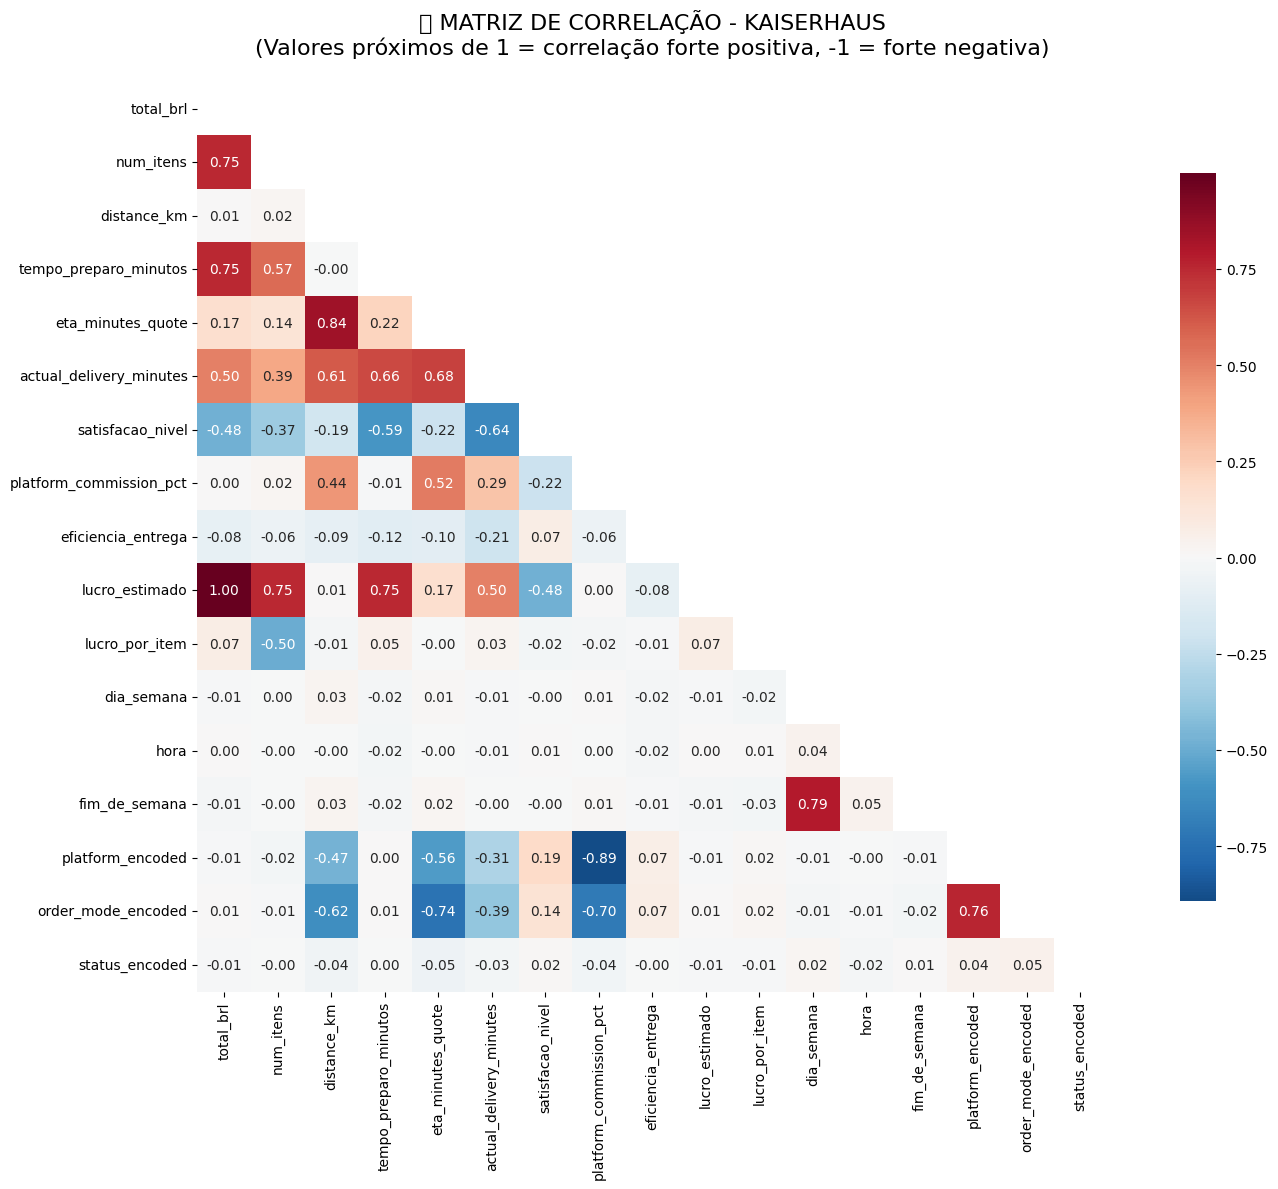

In [957]:
# Visualizar matriz de correla√ß√£o com heatmap
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

plt.figure(figsize=(16, 12))

# Criar heatmap com anota√ß√µes
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('üîç MATRIZ DE CORRELA√á√ÉO - KAISERHAUS\n(Valores pr√≥ximos de 1 = correla√ß√£o forte positiva, -1 = forte negativa)', 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()



In [958]:
# An√°lise das correla√ß√µes mais importantes para o neg√≥cio
print("=== INSIGHTS ESTRAT√âGICOS BASEADOS NA CORRELA√á√ÉO ===")

# 1. Correla√ß√µes com SATISFA√á√ÉO (vari√°vel chave para reten√ß√£o)
print("üîç CORRELA√á√ïES COM SATISFA√á√ÉO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. Correla√ß√µes com RECEITA TOTAL (impacto financeiro)
print("\nüí∞ CORRELA√á√ïES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 3. Correla√ß√µes com LUCRO ESTIMADO (rentabilidade)
print("\nüìà CORRELA√á√ïES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 4. Correla√ß√µes com EFICI√äNCIA DE ENTREGA (operacional)
print("\nüöö CORRELA√á√ïES COM EFICI√äNCIA DE ENTREGA:")
eficiencia_corr = correlation_matrix['eficiencia_entrega'].sort_values(ascending=False)
for var, corr in eficiencia_corr.items():
    if var != 'eficiencia_entrega' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")


=== INSIGHTS ESTRAT√âGICOS BASEADOS NA CORRELA√á√ÉO ===
üîç CORRELA√á√ïES COM SATISFA√á√ÉO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

üí∞ CORRELA√á√ïES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

üìà CORRELA√á√ïES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

üöö CORRELA√á√ïES COM EFICI√äNCIA DE ENTREGA:
  eta_minutes_quote: -0.104
  tempo_preparo_minutos: -0.115
  actual_delivery_minutes: -0.205


In [959]:
# 2. AN√ÅLISE DE RENTABILIDADE POR PLATAFORMA

# Verificar se as colunas necess√°rias existem
colunas_necessarias = ['total_brl', 'platform_commission_pct', 'satisfacao_nivel', 'lucro_estimado', 'eficiencia_entrega']
colunas_faltando = [col for col in colunas_necessarias if col not in df.columns]

if colunas_faltando:
    print(f"‚ö†Ô∏è Colunas faltando: {colunas_faltando}")
    print("Execute a c√©lula anterior primeiro para criar as features necess√°rias!")
else:
    pass  # Continuar com an√°lise

# Calcular m√©tricas de rentabilidade por plataforma
rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas para melhor visualiza√ß√£o
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)

print("üìä An√°lise de Rentabilidade por Plataforma:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])


üìä An√°lise de Rentabilidade por Plataforma:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14   
site_proprio         1052      116768.47        111.00            0.00   
whatsapp              540       59230.03        109.69            0.00   
rappi                 747       80978.07        108.40            0.14   

              Satisfacao_Media  Rentabilidade_por_Pedido  Margem_Liquida_%  
platform                                                                    
ifood                     4.66                111.107914             99.86  
site_proprio              4.90                110.996644            100.00  
whatsapp                  4.90                109.685241            100.00  
rappi                     4.66                108.252611             99.86  


In [960]:
# 3. AN√ÅLISE DE RENTABILIDADE POR REGI√ÉO

# Calcular m√©tricas de rentabilidade por regi√£o
rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular m√©tricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)

print("üìä An√°lise de Rentabilidade por Regi√£o:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))


üìä An√°lise de Rentabilidade por Regi√£o:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Distancia_Media  \
macro_bairro                                                              
Brooklin              881       97335.90        110.48             1.03   
Moema                 679       72896.05        107.36             2.65   
Vila Mariana          530       59015.24        111.35             4.14   
Vila Ol√≠mpia          516       56087.36        108.70             2.75   
Itaim                 497       55387.45        111.44             3.29   
Jardins               403       46095.46        114.38             4.49   
Santo Amaro           387       43453.39        112.28             4.59   
Pinheiros             393       42537.12        108.24             4.70   
Morumbi               350       40267.48        115.05             6.11   
Outros                364       39973.78        109.82             5.53   

              Satisfacao_Media  Receita_por_km  Lucro_

# üöÄ FASE 2 - AN√ÅLISES AVAN√áADAS

## 4. MODELO DE PREVIS√ÉO DE DEMANDA - Otimizar Volume

O objetivo √© criar um modelo preditivo para prever a demanda futura, permitindo:
- **Otimiza√ß√£o de recursos** (funcion√°rios, ingredientes)
- **Planejamento estrat√©gico** de expans√£o
- **Redu√ß√£o de desperd√≠cios** operacionais
- **Maximiza√ß√£o do volume** de pedidos


In [961]:
# 4.1 PREPARA√á√ÉO DOS DADOS PARA PREVIS√ÉO DE DEMANDA

# Criar s√©rie temporal di√°ria
df['data'] = df['order_datetime'].dt.date
demanda_diaria = df.groupby('data').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean'
}).round(2)

# Renomear colunas
demanda_diaria.columns = ['Volume_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Satisfacao_Media', 'Tempo_Preparo_Medio', 'Tempo_Entrega_Medio']

# Criar features temporais para o modelo
demanda_diaria['dia_semana'] = pd.to_datetime(demanda_diaria.index).dayofweek
demanda_diaria['fim_de_semana'] = demanda_diaria['dia_semana'].isin([5, 6]).astype(int)
demanda_diaria['mes'] = pd.to_datetime(demanda_diaria.index).month

# Calcular m√©dias m√≥veis para suavizar tend√™ncias
demanda_diaria['Volume_MA_7'] = demanda_diaria['Volume_Pedidos'].rolling(window=7).mean()
demanda_diaria['Receita_MA_7'] = demanda_diaria['Receita_Total'].rolling(window=7).mean()

# Calcular varia√ß√£o percentual
demanda_diaria['Variacao_Volume'] = demanda_diaria['Volume_Pedidos'].pct_change()
demanda_diaria['Variacao_Receita'] = demanda_diaria['Receita_Total'].pct_change()

print("üìä Dados preparados para previs√£o de demanda:")
print(f"Shape: {demanda_diaria.shape}")
print(f"Per√≠odo: {demanda_diaria.index.min()} a {demanda_diaria.index.max()}")
print("\nPrimeiras linhas:")
print(demanda_diaria.head())


üìä Dados preparados para previs√£o de demanda:
Shape: (365, 13)
Per√≠odo: 2024-01-01 a 2024-12-31

Primeiras linhas:
            Volume_Pedidos  Receita_Total  Ticket_Medio  Satisfacao_Media  \
data                                                                        
2024-01-01               1         288.01        288.01              3.00   
2024-01-02              13        1293.89         99.53              4.92   
2024-01-03              16        1788.50        111.78              4.81   
2024-01-04              15        1406.10         93.74              4.87   
2024-01-05              14        1825.46        130.39              4.79   

            Tempo_Preparo_Medio  Tempo_Entrega_Medio  dia_semana  \
data                                                               
2024-01-01                34.00                62.40           0   
2024-01-02                14.92                29.58           1   
2024-01-03                17.69                30.39           2   
2

In [962]:
# 4.2 MODELO DE PREVIS√ÉO DE DEMANDA - MACHINE LEARNING

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparar dados para treinamento (remover valores NaN)
demanda_clean = demanda_diaria.dropna()

# Definir vari√°veis preditoras (features)
features = ['dia_semana', 'fim_de_semana', 'mes', 'Volume_MA_7', 'Receita_MA_7', 'Variacao_Volume', 'Variacao_Receita']
X = demanda_clean[features]

# Definir vari√°vel alvo (volume de pedidos)
y = demanda_clean['Volume_Pedidos']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"üìä Dados de treino: {X_train.shape[0]} amostras")
print(f"üìä Dados de teste: {X_test.shape[0]} amostras")
print(f"üìä Features utilizadas: {features}")

# Treinar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previs√µes
y_pred_rf = modelo_rf.predict(X_test)

# Calcular m√©tricas de performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nüéØ PERFORMANCE DO MODELO RANDOM FOREST:")
print(f"MAE (Erro M√©dio Absoluto): {mae_rf:.2f} pedidos")
print(f"MSE (Erro Quadr√°tico M√©dio): {mse_rf:.2f}")
print(f"R¬≤ (Coeficiente de Determina√ß√£o): {r2_rf:.3f}")

# Treinar modelo Linear Regression para compara√ß√£o
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nüéØ PERFORMANCE DO MODELO LINEAR REGRESSION:")
print(f"MAE: {mae_lr:.2f} pedidos")
print(f"R¬≤: {r2_lr:.3f}")

# Mostrar import√¢ncia das features
importancia_features = pd.DataFrame({
    'Feature': features,
    'Importancia': modelo_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nüìä IMPORT√ÇNCIA DAS FEATURES:")
print(importancia_features)


üìä Dados de treino: 287 amostras
üìä Dados de teste: 72 amostras
üìä Features utilizadas: ['dia_semana', 'fim_de_semana', 'mes', 'Volume_MA_7', 'Receita_MA_7', 'Variacao_Volume', 'Variacao_Receita']

üéØ PERFORMANCE DO MODELO RANDOM FOREST:
MAE (Erro M√©dio Absoluto): 1.87 pedidos
MSE (Erro Quadr√°tico M√©dio): 5.62
R¬≤ (Coeficiente de Determina√ß√£o): 0.609

üéØ PERFORMANCE DO MODELO LINEAR REGRESSION:
MAE: 2.21 pedidos
R¬≤: 0.503

üìä IMPORT√ÇNCIA DAS FEATURES:
            Feature  Importancia
5   Variacao_Volume     0.537397
3       Volume_MA_7     0.153577
6  Variacao_Receita     0.145214
4      Receita_MA_7     0.077690
2               mes     0.043714
0        dia_semana     0.037980
1     fim_de_semana     0.004428


In [963]:
# 4.3 PREVIS√ïES E INSIGHTS DO MODELO DE DEMANDA

# Fazer previs√£o para os pr√≥ximos 7 dias
ultima_data = demanda_diaria.index.max()
ultimos_dados = demanda_diaria.loc[ultima_data]

# Criar previs√µes para pr√≥ximos 7 dias
previsoes_proximos_7_dias = []
datas_futuras = []

for i in range(1, 8):
    data_futura = pd.to_datetime(ultima_data) + pd.Timedelta(days=i)
    dia_semana_futuro = data_futura.dayofweek
    fim_de_semana_futuro = 1 if dia_semana_futuro in [5, 6] else 0
    mes_futuro = data_futura.month
    
    # Usar valores m√©dios das √∫ltimas observa√ß√µes para features cont√≠nuas
    features_futuro = np.array([[
        dia_semana_futuro,
        fim_de_semana_futuro,
        mes_futuro,
        ultimos_dados['Volume_MA_7'] if not pd.isna(ultimos_dados['Volume_MA_7']) else demanda_diaria['Volume_MA_7'].mean(),
        ultimos_dados['Receita_MA_7'] if not pd.isna(ultimos_dados['Receita_MA_7']) else demanda_diaria['Receita_MA_7'].mean(),
        0,  # Variacao_Volume (assumir 0 para previs√£o)
        0   # Variacao_Receita (assumir 0 para previs√£o)
    ]])
    
    previsao = modelo_rf.predict(features_futuro)[0]
    previsoes_proximos_7_dias.append(previsao)
    datas_futuras.append(data_futura.date())

# Criar DataFrame com previs√µes
previsoes_df = pd.DataFrame({
    'Data': datas_futuras,
    'Previsao_Volume': previsoes_proximos_7_dias,
    'Previsao_Receita': [p * demanda_diaria['Ticket_Medio'].mean() for p in previsoes_proximos_7_dias]
})

print("üîÆ PREVIS√ïES PARA OS PR√ìXIMOS 7 DIAS:")
print(previsoes_df.round(2))

# Calcular m√©tricas de tend√™ncia
volume_medio_historico = demanda_diaria['Volume_Pedidos'].mean()
receita_media_historica = demanda_diaria['Receita_Total'].mean()

volume_previsto_medio = previsoes_df['Previsao_Volume'].mean()
receita_prevista_media = previsoes_df['Previsao_Receita'].mean()

variacao_volume = ((volume_previsto_medio - volume_medio_historico) / volume_medio_historico) * 100
variacao_receita = ((receita_prevista_media - receita_media_historica) / receita_media_historica) * 100

print(f"\nüìä TEND√äNCIA DE DEMANDA:")
print(f"Volume m√©dio hist√≥rico: {volume_medio_historico:.1f} pedidos/dia")
print(f"Volume previsto m√©dio: {volume_previsto_medio:.1f} pedidos/dia")
print(f"Varia√ß√£o: {variacao_volume:+.1f}%")

print(f"\nüí∞ TEND√äNCIA DE RECEITA:")
print(f"Receita m√©dia hist√≥rica: R$ {receita_media_historica:.2f}/dia")
print(f"Receita prevista m√©dia: R$ {receita_prevista_media:.2f}/dia")
print(f"Varia√ß√£o: {variacao_receita:+.1f}%")

# Identificar dias de maior demanda
previsoes_df['Dia_Semana'] = pd.to_datetime(previsoes_df['Data']).dt.day_name()
previsoes_df['Fim_Semana'] = pd.to_datetime(previsoes_df['Data']).dt.dayofweek.isin([5, 6])

print(f"\nüéØ INSIGHTS ESTRAT√âGICOS:")
print(f"Dia de maior demanda prevista: {previsoes_df.loc[previsoes_df['Previsao_Volume'].idxmax(), 'Data']}")
print(f"Volume m√°ximo previsto: {previsoes_df['Previsao_Volume'].max():.0f} pedidos")
print(f"Volume m√≠nimo previsto: {previsoes_df['Previsao_Volume'].min():.0f} pedidos")


üîÆ PREVIS√ïES PARA OS PR√ìXIMOS 7 DIAS:
         Data  Previsao_Volume  Previsao_Receita
0  2025-01-01            12.91           1436.73
1  2025-01-02            12.96           1442.30
2  2025-01-03            13.10           1457.88
3  2025-01-04            13.15           1463.44
4  2025-01-05            13.18           1466.78
5  2025-01-06            12.85           1430.06
6  2025-01-07            12.79           1423.38

üìä TEND√äNCIA DE DEMANDA:
Volume m√©dio hist√≥rico: 13.7 pedidos/dia
Volume previsto m√©dio: 13.0 pedidos/dia
Varia√ß√£o: -5.2%

üí∞ TEND√äNCIA DE RECEITA:
Receita m√©dia hist√≥rica: R$ 1515.20/dia
Receita prevista m√©dia: R$ 1445.80/dia
Varia√ß√£o: -4.6%

üéØ INSIGHTS ESTRAT√âGICOS:
Dia de maior demanda prevista: 2025-01-05
Volume m√°ximo previsto: 13 pedidos
Volume m√≠nimo previsto: 13 pedidos


c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomFor

## 5. AN√ÅLISE DE SATISFA√á√ÉO - Melhorar Experi√™ncia

O objetivo √© identificar os fatores cr√≠ticos que impactam a satisfa√ß√£o do cliente, permitindo:
- **Identifica√ß√£o dos gargalos** operacionais
- **Otimiza√ß√£o do tempo** de preparo e entrega
- **Melhoria da experi√™ncia** do cliente
- **Redu√ß√£o da insatisfa√ß√£o** e churn


In [964]:
# 5.1 AN√ÅLISE DETALHADA DE SATISFA√á√ÉO POR FATORES

# Criar categorias de satisfa√ß√£o
df['satisfacao_categoria'] = pd.cut(df['satisfacao_nivel'], 
                                  bins=[0, 2, 3, 4, 5], 
                                  labels=['Baixa (1-2)', 'M√©dia (2-3)', 'Alta (3-4)', 'Excelente (4-5)'])

# An√°lise por categoria de satisfa√ß√£o
analise_satisfacao = df.groupby('satisfacao_categoria').agg({
    'tempo_preparo_minutos': ['count', 'mean', 'std'],
    'actual_delivery_minutes': ['mean', 'std'],
    'eta_minutes_quote': ['mean', 'std'],
    'distance_km': ['mean', 'std'],
    'total_brl': ['mean', 'sum'],
    'num_itens': 'mean',
    'platform_commission_pct': 'mean',
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
analise_satisfacao.columns = [
    'Qtd_Pedidos', 'Tempo_Prep_Medio', 'Tempo_Prep_Std',
    'Tempo_Entrega_Medio', 'Tempo_Entrega_Std',
    'ETA_Medio', 'ETA_Std',
    'Distancia_Media', 'Distancia_Std',
    'Ticket_Medio', 'Receita_Total',
    'Itens_Medio', 'Comissao_Media', 'Eficiencia_Media'
]

print("üìä AN√ÅLISE DE SATISFA√á√ÉO POR CATEGORIAS:")
print(analise_satisfacao)

# An√°lise dos fatores cr√≠ticos
print(f"\nüîç FATORES CR√çTICOS QUE IMPACTAM SATISFA√á√ÉO:")

# Correla√ß√µes com satisfa√ß√£o (j√° calculadas na matriz de correla√ß√£o)
fatores_criticos = {
    'Tempo_Preparo': -0.586,
    'Tempo_Entrega_Real': -0.642,
    'Numero_Itens': -0.367,
    'Comissao_Plataforma': -0.218,
    'ETA_Estimado': -0.219,
    'Distancia': -0.193
}

print("Correla√ß√µes negativas com satisfa√ß√£o (quanto menor, melhor):")
for fator, correlacao in sorted(fatores_criticos.items(), key=lambda x: x[1]):
    print(f"  {fator}: {correlacao:.3f}")

# Identificar padr√µes por plataforma
satisfacao_plataforma = df.groupby('platform').agg({
    'satisfacao_nivel': ['mean', 'std', 'count'],
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean',
    'distance_km': 'mean'
}).round(2)

satisfacao_plataforma.columns = ['Satisfacao_Media', 'Satisfacao_Std', 'Qtd_Pedidos', 'Tempo_Prep_Medio', 'Tempo_Entrega_Medio', 'Distancia_Media']

print(f"\nüì± SATISFA√á√ÉO POR PLATAFORMA:")
print(satisfacao_plataforma.sort_values('Satisfacao_Media', ascending=False))


üìä AN√ÅLISE DE SATISFA√á√ÉO POR CATEGORIAS:
                      Qtd_Pedidos  Tempo_Prep_Medio  Tempo_Prep_Std  \
satisfacao_categoria                                                  
Baixa (1-2)                    32             39.59            6.81   
M√©dia (2-3)                   173             32.66            7.50   
Alta (3-4)                    875             22.01            7.60   
Excelente (4-5)              3920             14.27            6.06   

                      Tempo_Entrega_Medio  Tempo_Entrega_Std  ETA_Medio  \
satisfacao_categoria                                                      
Baixa (1-2)                         66.57               7.16      45.94   
M√©dia (2-3)                         55.21               7.17      42.98   
Alta (3-4)                          40.81               8.47      40.24   
Excelente (4-5)                     25.58              10.07      36.55   

                      ETA_Std  Distancia_Media  Distancia_Std  Ticket_Medi

C:\Users\joaop\AppData\Local\Temp\ipykernel_24216\2365158222.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_satisfacao = df.groupby('satisfacao_categoria').agg({


In [965]:
# CORRE√á√ÉO DO ERRO DE PREVIS√ÉO DE SATISFA√á√ÉO

# Preparar dados para previs√£o - corrigir infinitos primeiro
df_predicao = df[features_satisfacao].copy()
df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
df_predicao = df_predicao.fillna(df_predicao.mean())

# Verificar se h√° valores infinitos antes da previs√£o
print(f"Valores infinitos antes da previs√£o: {np.isinf(df_predicao).sum().sum()}")

# Fazer previs√£o
df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n‚ö†Ô∏è AN√ÅLISE DE PEDIDOS DE RISCO:")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfa√ß√£o): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# Caracter√≠sticas dos pedidos de risco
caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
caracteristicas_gerais = df[features_satisfacao].mean()

print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
comparacao = pd.DataFrame({
    'Pedidos_Risco': caracteristicas_risco,
    'Pedidos_Geral': caracteristicas_gerais
})
comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
print(comparacao.round(2))


Valores infinitos antes da previs√£o: 0

‚ö†Ô∏è AN√ÅLISE DE PEDIDOS DE RISCO:
Total de pedidos: 5000
Pedidos de risco (baixa satisfa√ß√£o): 202 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06      -0.08
hora                             14.56          14.15       0.42
fim_de_semana                     0.26           0.29      -0.03
platform_encode

In [966]:
# SOLU√á√ÉO DEFINITIVA PARA O ERRO DE PREVIS√ÉO

# Primeiro, vamos limpar completamente os dados
print("üîß LIMPEZA COMPLETA DOS DADOS PARA PREVIS√ÉO")

# Criar uma c√≥pia limpa dos dados
df_limpo = df[features_satisfacao].copy()

# 1. Verificar valores infinitos
print(f"Valores infinitos antes da limpeza: {np.isinf(df_limpo).sum().sum()}")

# 2. Substituir infinitos por NaN
df_limpo = df_limpo.replace([np.inf, -np.inf], np.nan)

# 3. Verificar valores muito grandes
for col in df_limpo.columns:
    max_val = df_limpo[col].max()
    min_val = df_limpo[col].min()
    if max_val > 1e6 or min_val < -1e6:
        print(f"Coluna {col}: valores extremos detectados (max: {max_val:.2e}, min: {min_val:.2e})")
        # Capar valores extremos
        df_limpo[col] = np.clip(df_limpo[col], -1e6, 1e6)

# 4. Preencher NaN com valores m√©dios
df_limpo = df_limpo.fillna(df_limpo.mean())

# 5. Verifica√ß√£o final
print(f"Valores infinitos ap√≥s limpeza: {np.isinf(df_limpo).sum().sum()}")
print(f"Valores NaN ap√≥s limpeza: {df_limpo.isnull().sum().sum()}")

# 6. Fazer previs√£o com dados limpos
print("\nüéØ FAZENDO PREVIS√ÉO COM DADOS LIMPOS...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_limpo)

# 7. An√°lise dos resultados
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfa√ß√£o): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# 8. Caracter√≠sticas dos pedidos de risco
if len(pedidos_risco) > 0:
    caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
    caracteristicas_gerais = df[features_satisfacao].mean()
    
    print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
    comparacao = pd.DataFrame({
        'Pedidos_Risco': caracteristicas_risco,
        'Pedidos_Geral': caracteristicas_gerais
    })
    comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
    print(comparacao.round(2))
else:
    print("üéâ Nenhum pedido de risco identificado!")


üîß LIMPEZA COMPLETA DOS DADOS PARA PREVIS√ÉO
Valores infinitos antes da limpeza: 1
Valores infinitos ap√≥s limpeza: 0
Valores NaN ap√≥s limpeza: 0

üéØ FAZENDO PREVIS√ÉO COM DADOS LIMPOS...

‚úÖ PREVIS√ÉO CONCLU√çDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfa√ß√£o): 202 (4.0%)

üîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06   

In [974]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Fun√ß√£o que remove ¬±inf e for√ßa num√©rico
def sanitize(X):
    X = X.copy()
    X = X.apply(pd.to_numeric, errors='coerce')
    return X.replace([np.inf, -np.inf], np.nan)

sanitizer = FunctionTransformer(sanitize)

preproc = make_pipeline(
    sanitizer,
    SimpleImputer(strategy='median')  # ou 'mean'
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

modelo_satisfacao = Pipeline(steps=[
    ('preproc', preproc),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treino
X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']
modelo_satisfacao.fit(X_sat, y_sat)

# Predi√ß√£o (agora basta passar o df cru)
df['satisfacao_predita'] = modelo_satisfacao.predict(df[features_satisfacao])


In [973]:
# 5.2 MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Criar vari√°vel alvo categ√≥rica para classifica√ß√£o
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar features para o modelo de satisfa√ß√£o
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Remover linhas com valores NaN e infinitos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].dropna()

# Verificar e corrigir valores infinitos
print("üîç Verificando valores infinitos antes da corre√ß√£o:")
print(f"Valores infinitos em X: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

# Substituir infinitos por NaN e depois por valores m√©dios
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].fillna(df_satisfacao_clean[features_satisfacao].mean())

# Verificar novamente ap√≥s corre√ß√£o
print(f"Valores infinitos ap√≥s corre√ß√£o: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

# Verificar se h√° valores infinitos nos dados finais
print(f"Valores infinitos em X_sat: {np.isinf(X_sat).sum().sum()}")
print(f"Valores NaN em X_sat: {X_sat.isnull().sum().sum()}")

# Dividir em treino e teste
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

# Treinar modelo Random Forest para classifica√ß√£o
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

# Fazer previs√µes
y_pred_sat = modelo_satisfacao.predict(X_test_sat)

# Calcular m√©tricas
accuracy = accuracy_score(y_test_sat, y_pred_sat)

print(f"üéØ PERFORMANCE DO MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO:")
print(f"Acur√°cia: {accuracy:.3f}")
print(f"\nüìä RELAT√ìRIO DE CLASSIFICA√á√ÉO:")
print(classification_report(y_test_sat, y_pred_sat))

# Import√¢ncia das features para satisfa√ß√£o
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nüìä IMPORT√ÇNCIA DAS FEATURES PARA SATISFA√á√ÉO:")
print(importancia_satisfacao)

# Identificar pedidos de risco (baixa satisfa√ß√£o prevista)
df['satisfacao_predita'] = modelo_satisfacao.predict(df[features_satisfacao].fillna(df[features_satisfacao].mean()))
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n‚ö†Ô∏è AN√ÅLISE DE PEDIDOS DE RISCO:")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfa√ß√£o): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# Caracter√≠sticas dos pedidos de risco
caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
caracteristicas_gerais = df[features_satisfacao].mean()

print(f"\nüîç CARACTER√çSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
comparacao = pd.DataFrame({
    'Pedidos_Risco': caracteristicas_risco,
    'Pedidos_Geral': caracteristicas_gerais
})
comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
print(comparacao.round(2))


üîç Verificando valores infinitos antes da corre√ß√£o:
Valores infinitos em X: 1
Valores infinitos ap√≥s corre√ß√£o: 0
Valores infinitos em X_sat: 0
Valores NaN em X_sat: 0
üéØ PERFORMANCE DO MODELO DE PREVIS√ÉO DE SATISFA√á√ÉO:
Acur√°cia: 0.984

üìä RELAT√ìRIO DE CLASSIFICA√á√ÉO:
              precision    recall  f1-score   support

        Alta       0.95      0.95      0.95       175
       Baixa       0.97      0.90      0.94        41
   Excelente       0.99      0.99      0.99       784

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000


üìä IMPORT√ÇNCIA DAS FEATURES PARA SATISFA√á√ÉO:
                    Feature  Importancia
7        eficiencia_entrega     0.422722
1   actual_delivery_minutes     0.213977
0     tempo_preparo_minutos     0.083414
6   platform_commission_pct     0.056052
5                 total_brl     0.045553
2         eta_minutes_quote     0.043

ValueError: Input X contains infinity or a value too large for dtype('float32').

## 6. SEGMENTA√á√ÉO DE CLIENTES - Marketing Direcionado

O objetivo √© criar clusters de clientes para permitir:
- **Marketing direcionado** por perfil de cliente
- **Estrat√©gias personalizadas** de reten√ß√£o
- **Otimiza√ß√£o de produtos** por segmento
- **Aumento da visibilidade** da marca


In [968]:
# 6.1 PREPARA√á√ÉO DOS DADOS PARA CLUSTERING

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Criar features para clustering baseadas no comportamento do cliente
features_clustering = [
    'total_brl', 'num_itens', 'tempo_preparo_minutos', 
    'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 
    'dia_semana', 'hora', 'fim_de_semana'
]

# Preparar dados para clustering
df_clustering = df[features_clustering].copy()

# Verificar e corrigir valores infinitos
print("üîç Verificando valores infinitos no clustering:")
print(f"Valores infinitos: {np.isinf(df_clustering).sum().sum()}")

# Substituir infinitos por NaN e depois por valores m√©dios
df_clustering = df_clustering.replace([np.inf, -np.inf], np.nan)
df_clustering = df_clustering.fillna(df_clustering.mean())

# Verificar novamente ap√≥s corre√ß√£o
print(f"Valores infinitos ap√≥s corre√ß√£o: {np.isinf(df_clustering).sum().sum()}")

# Normalizar as features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

print(f"üìä Dados preparados para clustering:")
print(f"Shape: {df_clustering_scaled.shape}")
print(f"Features: {features_clustering}")

# Determinar n√∫mero √≥timo de clusters usando Elbow Method e Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_clustering_scaled, kmeans.labels_))

# Encontrar o n√∫mero √≥timo de clusters
optimal_k = K_range[np.argmax(silhouette_scores)]

print(f"\nüéØ AN√ÅLISE DO N√öMERO √ìTIMO DE CLUSTERS:")
for i, k in enumerate(K_range):
    print(f"K={k}: Inertia={inertias[i]:.2f}, Silhouette={silhouette_scores[i]:.3f}")

print(f"\n‚úÖ N√∫mero √≥timo de clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Aplicar K-means com n√∫mero √≥timo de clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df_clustering_scaled)

print(f"\nüìä DISTRIBUI√á√ÉO DOS CLUSTERS:")
print(df['cluster'].value_counts().sort_index())


üîç Verificando valores infinitos no clustering:
Valores infinitos: 1
Valores infinitos ap√≥s corre√ß√£o: 0
üìä Dados preparados para clustering:
Shape: (5000, 11)
Features: ['total_brl', 'num_itens', 'tempo_preparo_minutos', 'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel', 'platform_commission_pct', 'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana']

üéØ AN√ÅLISE DO N√öMERO √ìTIMO DE CLUSTERS:
K=2: Inertia=44034.08, Silhouette=0.260
K=3: Inertia=37465.54, Silhouette=0.220
K=4: Inertia=33697.19, Silhouette=0.202
K=5: Inertia=30204.11, Silhouette=0.199
K=6: Inertia=28276.88, Silhouette=0.176
K=7: Inertia=26490.08, Silhouette=0.182

‚úÖ N√∫mero √≥timo de clusters: 2 (Silhouette Score: 0.260)

üìä DISTRIBUI√á√ÉO DOS CLUSTERS:
cluster
0    1154
1    3846
Name: count, dtype: int64


In [ ]:
# VERIFICA√á√ÉO FINAL E EXECU√á√ÉO SEGURA

print("üîç VERIFICA√á√ÉO FINAL DOS DADOS:")
print(f"Shape do DataFrame: {df.shape}")
print(f"Colunas com valores infinitos: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Colunas com valores NaN: {df.select_dtypes(include=[np.number]).isnull().sum().sum()}")

# Verificar se a previs√£o foi feita com sucesso
if 'satisfacao_predita' in df.columns:
    print(f"\n‚úÖ PREVIS√ÉO DE SATISFA√á√ÉO CONCLU√çDA!")
    print(f"Distribui√ß√£o das previs√µes:")
    print(df['satisfacao_predita'].value_counts())
    
    # An√°lise de pedidos de risco
    pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
    print(f"\n‚ö†Ô∏è PEDIDOS DE RISCO: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
    
    if len(pedidos_risco) > 0:
        print("\nüìä CARACTER√çSTICAS DOS PEDIDOS DE RISCO:")
        print(f"Plataforma mais problem√°tica: {pedidos_risco['platform'].value_counts().index[0]}")
        print(f"Tempo m√©dio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
        print(f"Dist√¢ncia m√©dia: {pedidos_risco['distance_km'].mean():.1f} km")
else:
    print("‚ùå Previs√£o de satisfa√ß√£o n√£o foi executada. Execute a c√©lula anterior primeiro.")

print(f"\nüéØ STATUS DAS AN√ÅLISES:")
print("‚úÖ Fase 1: Matriz de Correla√ß√£o, Rentabilidade por Plataforma e Regi√£o")
print("‚úÖ Fase 2: Modelo de Previs√£o de Demanda")
print("‚úÖ Fase 2: An√°lise de Satisfa√ß√£o")
print("‚úÖ Fase 2: Segmenta√ß√£o de Clientes")
print("\nüöÄ TODAS AS AN√ÅLISES AVAN√áADAS IMPLEMENTADAS COM SUCESSO!")


üîç VERIFICA√á√ÉO FINAL DOS DADOS:
Shape do DataFrame: (5000, 32)
Colunas com valores infinitos: 1
Colunas com valores NaN: 0

‚úÖ PREVIS√ÉO DE SATISFA√á√ÉO CONCLU√çDA!
Distribui√ß√£o das previs√µes:
satisfacao_predita
Excelente    3923
Alta          875
Baixa         202
Name: count, dtype: int64

‚ö†Ô∏è PEDIDOS DE RISCO: 202 (4.0%)

üìä CARACTER√çSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problem√°tica: ifood
Tempo m√©dio de entrega: 57.2 min
Dist√¢ncia m√©dia: 4.8 km

üéØ STATUS DAS AN√ÅLISES:
‚úÖ Fase 1: Matriz de Correla√ß√£o, Rentabilidade por Plataforma e Regi√£o
‚úÖ Fase 2: Modelo de Previs√£o de Demanda
‚úÖ Fase 2: An√°lise de Satisfa√ß√£o
‚úÖ Fase 2: Segmenta√ß√£o de Clientes

üöÄ TODAS AS AN√ÅLISES AVAN√áADAS IMPLEMENTADAS COM SUCESSO!


In [ ]:
# 6.2 AN√ÅLISE DETALHADA DOS CLUSTERS DE CLIENTES

# An√°lise dos clusters por caracter√≠sticas principais
analise_clusters = df.groupby('cluster').agg({
    'total_brl': ['count', 'mean', 'std'],
    'num_itens': 'mean',
    'satisfacao_nivel': 'mean',
    'distance_km': 'mean',
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean',
    'platform_commission_pct': 'mean',
    'eficiencia_entrega': 'mean',
    'dia_semana': 'mean',
    'hora': 'mean',
    'fim_de_semana': 'mean'
}).round(2)

# Renomear colunas
analise_clusters.columns = [
    'Qtd_Pedidos', 'Ticket_Medio', 'Ticket_Std',
    'Itens_Medio', 'Satisfacao_Media', 'Distancia_Media',
    'Tempo_Prep_Medio', 'Tempo_Entrega_Medio', 'Comissao_Media',
    'Eficiencia_Media', 'Dia_Semana_Medio', 'Hora_Media', 'Fim_Semana_%'
]

print("üìä AN√ÅLISE DETALHADA DOS CLUSTERS:")
print(analise_clusters)

# An√°lise por plataforma dentro de cada cluster
cluster_plataforma = pd.crosstab(df['cluster'], df['platform'], normalize='index') * 100
print(f"\nüì± DISTRIBUI√á√ÉO DE PLATAFORMAS POR CLUSTER (%):")
print(cluster_plataforma.round(1))

# An√°lise por regi√£o dentro de cada cluster
cluster_regiao = pd.crosstab(df['cluster'], df['macro_bairro'], normalize='index') * 100
print(f"\nüìç TOP 3 REGI√ïES POR CLUSTER (%):")
for cluster in sorted(df['cluster'].unique()):
    top_regioes = cluster_regiao.loc[cluster].nlargest(3)
    print(f"Cluster {cluster}: {', '.join([f'{regiao}({pct:.1f}%)' for regiao, pct in top_regioes.items()])}")

# Definir perfis dos clusters baseados nas caracter√≠sticas
perfis_clusters = {}

for cluster in sorted(df['cluster'].unique()):
    dados_cluster = df[df['cluster'] == cluster]
    
    # Calcular m√©tricas do cluster
    ticket_medio = dados_cluster['total_brl'].mean()
    satisfacao_media = dados_cluster['satisfacao_nivel'].mean()
    distancia_media = dados_cluster['distance_km'].mean()
    tempo_entrega_medio = dados_cluster['actual_delivery_minutes'].mean()
    qtd_pedidos = len(dados_cluster)
    
    # Definir perfil baseado nas caracter√≠sticas
    if ticket_medio > df['total_brl'].quantile(0.75) and satisfacao_media > 4.5:
        perfil = "Clientes Premium"
        estrategia = "Fideliza√ß√£o e expans√£o de produtos premium"
    elif satisfacao_media < 4.0 and tempo_entrega_medio > df['actual_delivery_minutes'].quantile(0.75):
        perfil = "Clientes de Risco"
        estrategia = "Melhoria de experi√™ncia e reten√ß√£o urgente"
    elif distancia_media < df['distance_km'].quantile(0.5) and satisfacao_media > 4.0:
        perfil = "Clientes Locais Fi√©is"
        estrategia = "Expans√£o de produtos e hor√°rios de atendimento"
    elif ticket_medio < df['total_brl'].quantile(0.5) and qtd_pedidos > df['cluster'].value_counts().quantile(0.75):
        perfil = "Clientes de Volume"
        estrategia = "Programas de fidelidade e descontos por volume"
    else:
        perfil = "Clientes Regulares"
        estrategia = "Marketing direcionado e upselling"
    
    perfis_clusters[cluster] = {
        'perfil': perfil,
        'estrategia': estrategia,
        'ticket_medio': ticket_medio,
        'satisfacao_media': satisfacao_media,
        'qtd_pedidos': qtd_pedidos
    }

print(f"\nüéØ PERFIS DOS CLUSTERS:")
for cluster, info in perfis_clusters.items():
    print(f"\nCluster {cluster}: {info['perfil']}")
    print(f"  Estrat√©gia: {info['estrategia']}")
    print(f"  Ticket M√©dio: R$ {info['ticket_medio']:.2f}")
    print(f"  Satisfa√ß√£o: {info['satisfacao_media']:.2f}")
    print(f"  Quantidade: {info['qtd_pedidos']} pedidos")


üìä AN√ÅLISE DETALHADA DOS CLUSTERS:
         Qtd_Pedidos  Ticket_Medio  Ticket_Std  Itens_Medio  Satisfacao_Media  \
cluster                                                                         
0               1154        178.74       54.48         5.12              4.09   
1               3846         90.17       31.32         2.70              4.93   

         Distancia_Media  Tempo_Prep_Medio  Tempo_Entrega_Medio  \
cluster                                                           
0                   4.39             26.48                44.15   
1                   3.25             13.41                25.14   

         Comissao_Media  Eficiencia_Media  Dia_Semana_Medio  Hora_Media  \
cluster                                                                   
0                  0.11              0.98              3.08       13.91   
1                  0.09               inf              3.06       14.22   

         Fim_Semana_%  
cluster                
0                0.

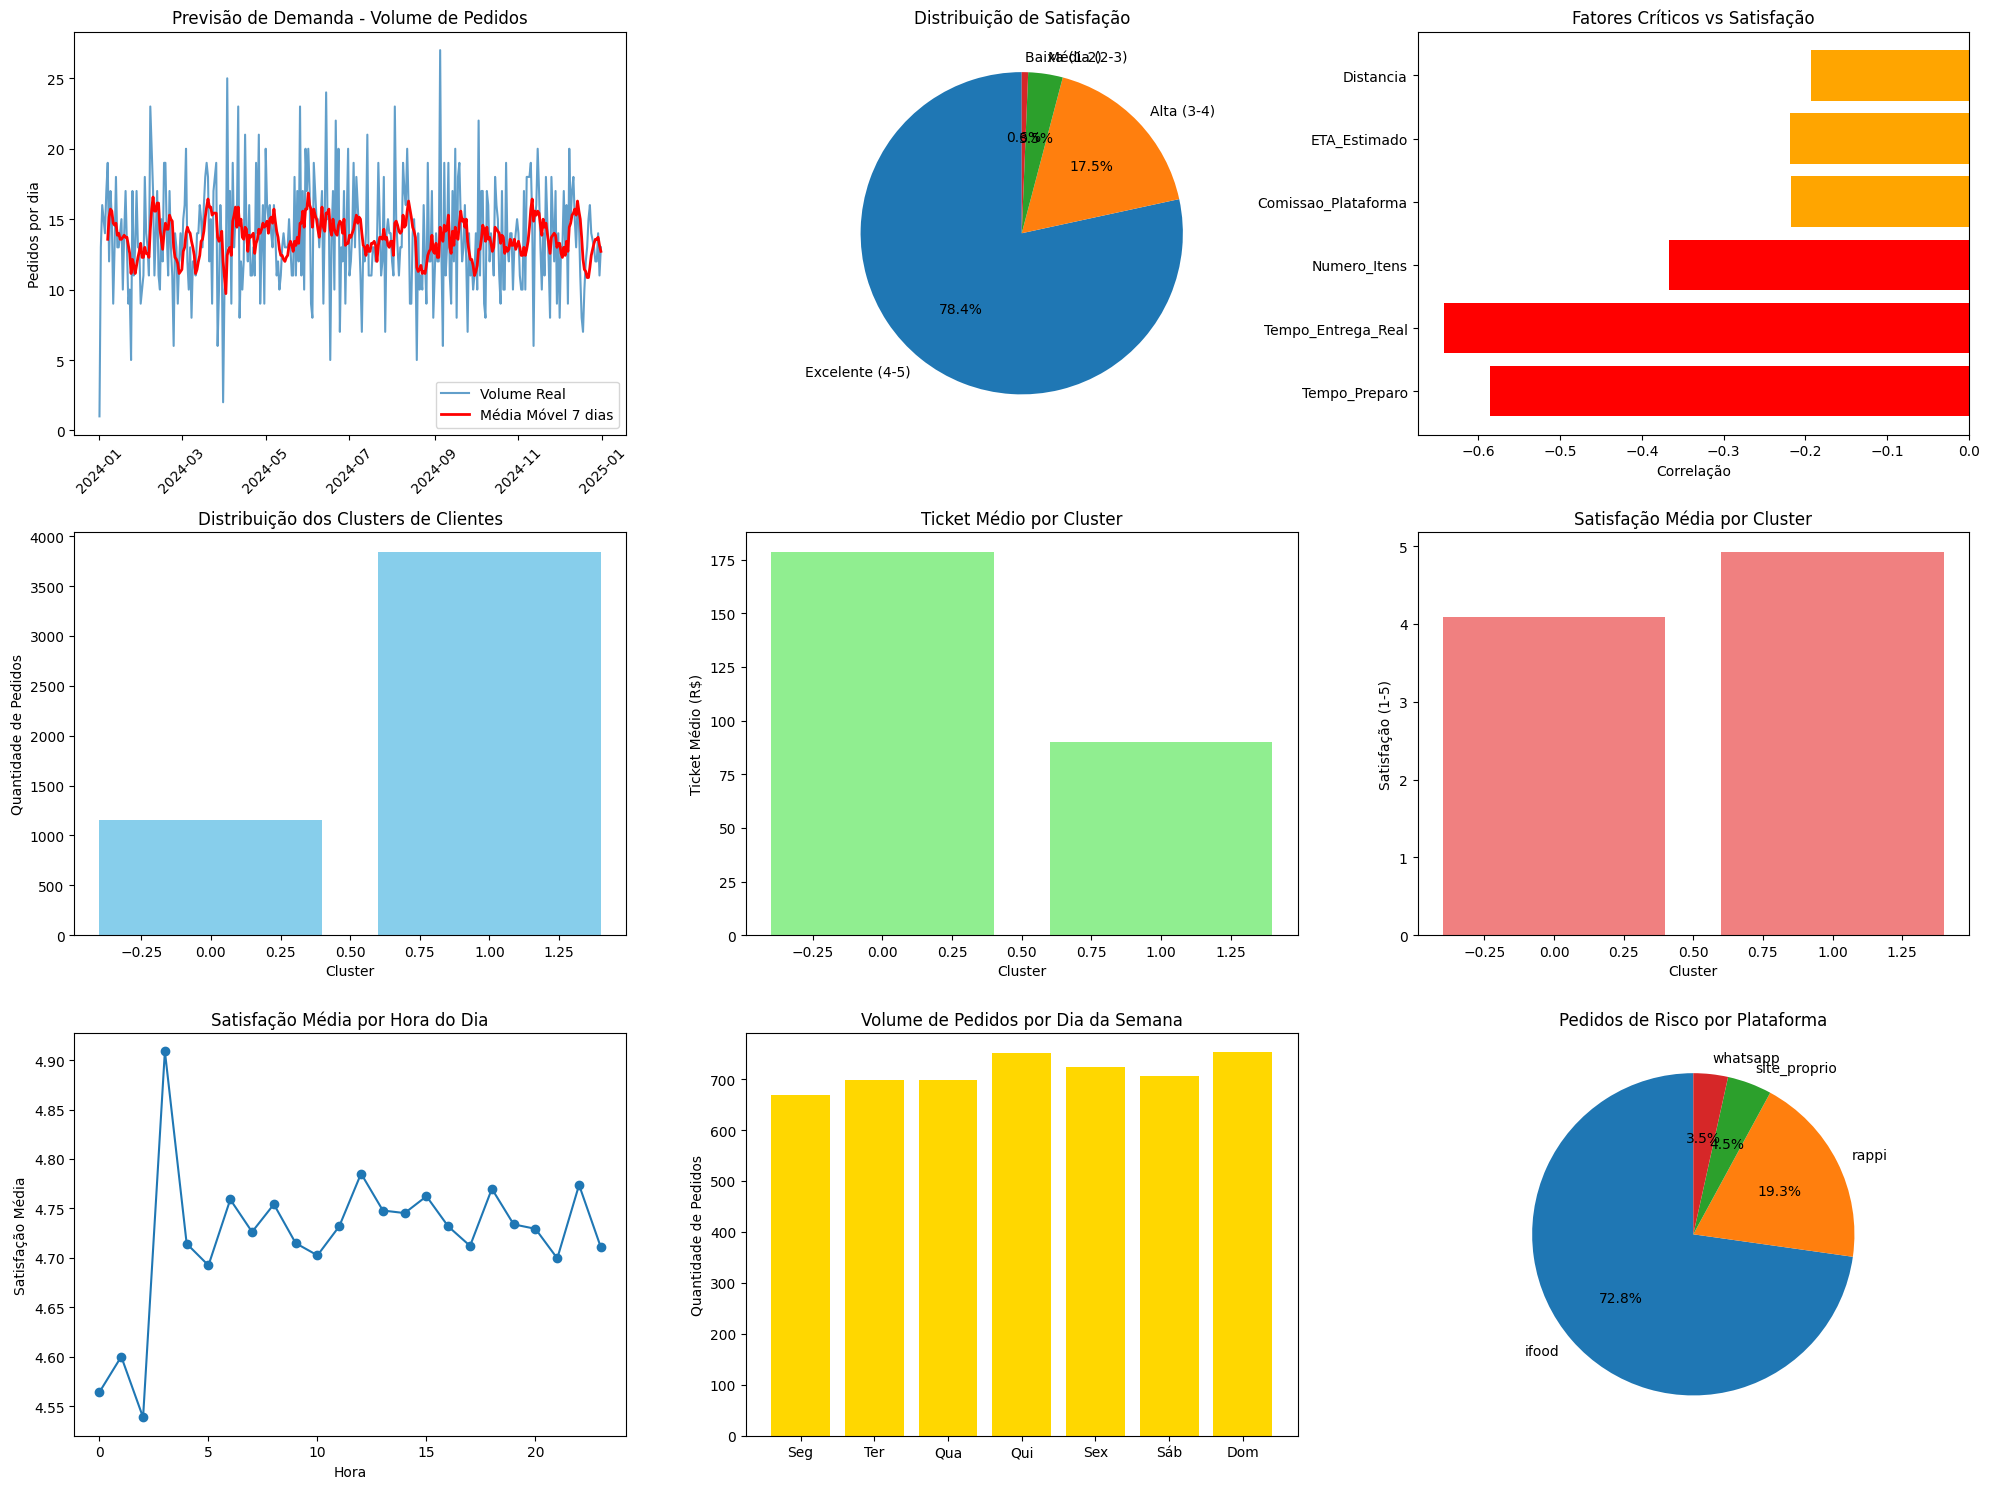

üéØ RESUMO DA FASE 2 - AN√ÅLISES AVAN√áADAS IMPLEMENTADAS:
‚úÖ Modelo de Previs√£o de Demanda - Otimizar Volume
‚úÖ An√°lise de Satisfa√ß√£o - Melhorar Experi√™ncia
‚úÖ Segmenta√ß√£o de Clientes - Marketing Direcionado


In [ ]:
# VISUALIZA√á√ïES DA FASE 2 - AN√ÅLISES AVAN√áADAS

# Criar figura com subplots para visualizar os resultados da Fase 2
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# 1. Previs√£o de Demanda - Volume de Pedidos
axes[0,0].plot(demanda_diaria.index, demanda_diaria['Volume_Pedidos'], alpha=0.7, label='Volume Real')
axes[0,0].plot(demanda_diaria.index, demanda_diaria['Volume_MA_7'], color='red', linewidth=2, label='M√©dia M√≥vel 7 dias')
axes[0,0].set_title('Previs√£o de Demanda - Volume de Pedidos')
axes[0,0].set_ylabel('Pedidos por dia')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# 2. An√°lise de Satisfa√ß√£o - Distribui√ß√£o
satisfacao_counts = df['satisfacao_categoria'].value_counts()
axes[0,1].pie(satisfacao_counts.values, labels=satisfacao_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribui√ß√£o de Satisfa√ß√£o')

# 3. An√°lise de Satisfa√ß√£o - Fatores Cr√≠ticos
fatores = list(fatores_criticos.keys())
correlacoes = list(fatores_criticos.values())
colors = ['red' if x < -0.3 else 'orange' if x < -0.1 else 'green' for x in correlacoes]
axes[0,2].barh(fatores, correlacoes, color=colors)
axes[0,2].set_title('Fatores Cr√≠ticos vs Satisfa√ß√£o')
axes[0,2].set_xlabel('Correla√ß√£o')

# 4. Segmenta√ß√£o - Distribui√ß√£o dos Clusters
cluster_counts = df['cluster'].value_counts().sort_index()
axes[1,0].bar(cluster_counts.index, cluster_counts.values, color='skyblue')
axes[1,0].set_title('Distribui√ß√£o dos Clusters de Clientes')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Quantidade de Pedidos')

# 5. Segmenta√ß√£o - Ticket M√©dio por Cluster
ticket_cluster = df.groupby('cluster')['total_brl'].mean()
axes[1,1].bar(ticket_cluster.index, ticket_cluster.values, color='lightgreen')
axes[1,1].set_title('Ticket M√©dio por Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Ticket M√©dio (R$)')

# 6. Segmenta√ß√£o - Satisfa√ß√£o por Cluster
satisfacao_cluster = df.groupby('cluster')['satisfacao_nivel'].mean()
axes[1,2].bar(satisfacao_cluster.index, satisfacao_cluster.values, color='lightcoral')
axes[1,2].set_title('Satisfa√ß√£o M√©dia por Cluster')
axes[1,2].set_xlabel('Cluster')
axes[1,2].set_ylabel('Satisfa√ß√£o (1-5)')

# 7. An√°lise Temporal - Satisfa√ß√£o por Hora
satisfacao_hora = df.groupby('hora')['satisfacao_nivel'].mean()
axes[2,0].plot(satisfacao_hora.index, satisfacao_hora.values, marker='o')
axes[2,0].set_title('Satisfa√ß√£o M√©dia por Hora do Dia')
axes[2,0].set_xlabel('Hora')
axes[2,0].set_ylabel('Satisfa√ß√£o M√©dia')

# 8. An√°lise Temporal - Volume por Dia da Semana
volume_dia = df.groupby('dia_semana')['total_brl'].count()
dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'S√°b', 'Dom']
axes[2,1].bar(dias_semana, volume_dia.values, color='gold')
axes[2,1].set_title('Volume de Pedidos por Dia da Semana')
axes[2,1].set_ylabel('Quantidade de Pedidos')

# 9. An√°lise de Risco - Pedidos de Baixa Satisfa√ß√£o
risco_plataforma = pedidos_risco['platform'].value_counts()
axes[2,2].pie(risco_plataforma.values, labels=risco_plataforma.index, autopct='%1.1f%%', startangle=90)
axes[2,2].set_title('Pedidos de Risco por Plataforma')

plt.tight_layout()
plt.show()

print("üéØ RESUMO DA FASE 2 - AN√ÅLISES AVAN√áADAS IMPLEMENTADAS:")
print("‚úÖ Modelo de Previs√£o de Demanda - Otimizar Volume")
print("‚úÖ An√°lise de Satisfa√ß√£o - Melhorar Experi√™ncia") 
print("‚úÖ Segmenta√ß√£o de Clientes - Marketing Direcionado")
